# Ultimate Tech Take-home Challenge

## Part 1 EDA

* Aggreate login counts on 15min time intervals.
* Explain the resulting counts in ways that characterize patterns of demand
* Identify imporant features of demand.
    - Daily cycles. 


### Import libraries

In [391]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import strptime
from dateutil import parser
from dateutil.parser import parse
from datetime import datetime
from pylab import rcParams
import statsmodels.api as sm

### Read data

In [392]:
logins = pd.read_json('../ultimate_challenge/logins.json')

In [393]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [394]:
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [395]:
logins['login_time'] = pd.to_datetime(logins['login_time'], infer_datetime_format=True)
logins.set_index('login_time', inplace=True)

In [396]:
logins.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

### Aggregate logins 

15 minute gropus and list size of groups according to how many logins occured during the 15 minure interval

In [397]:
data_agg = pd.DataFrame(logins.groupby(pd.Grouper(freq='15Min')).size())
data_agg

,0
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


### 15 Min Intervals

[]

<Figure size 1500x1000 with 0 Axes>

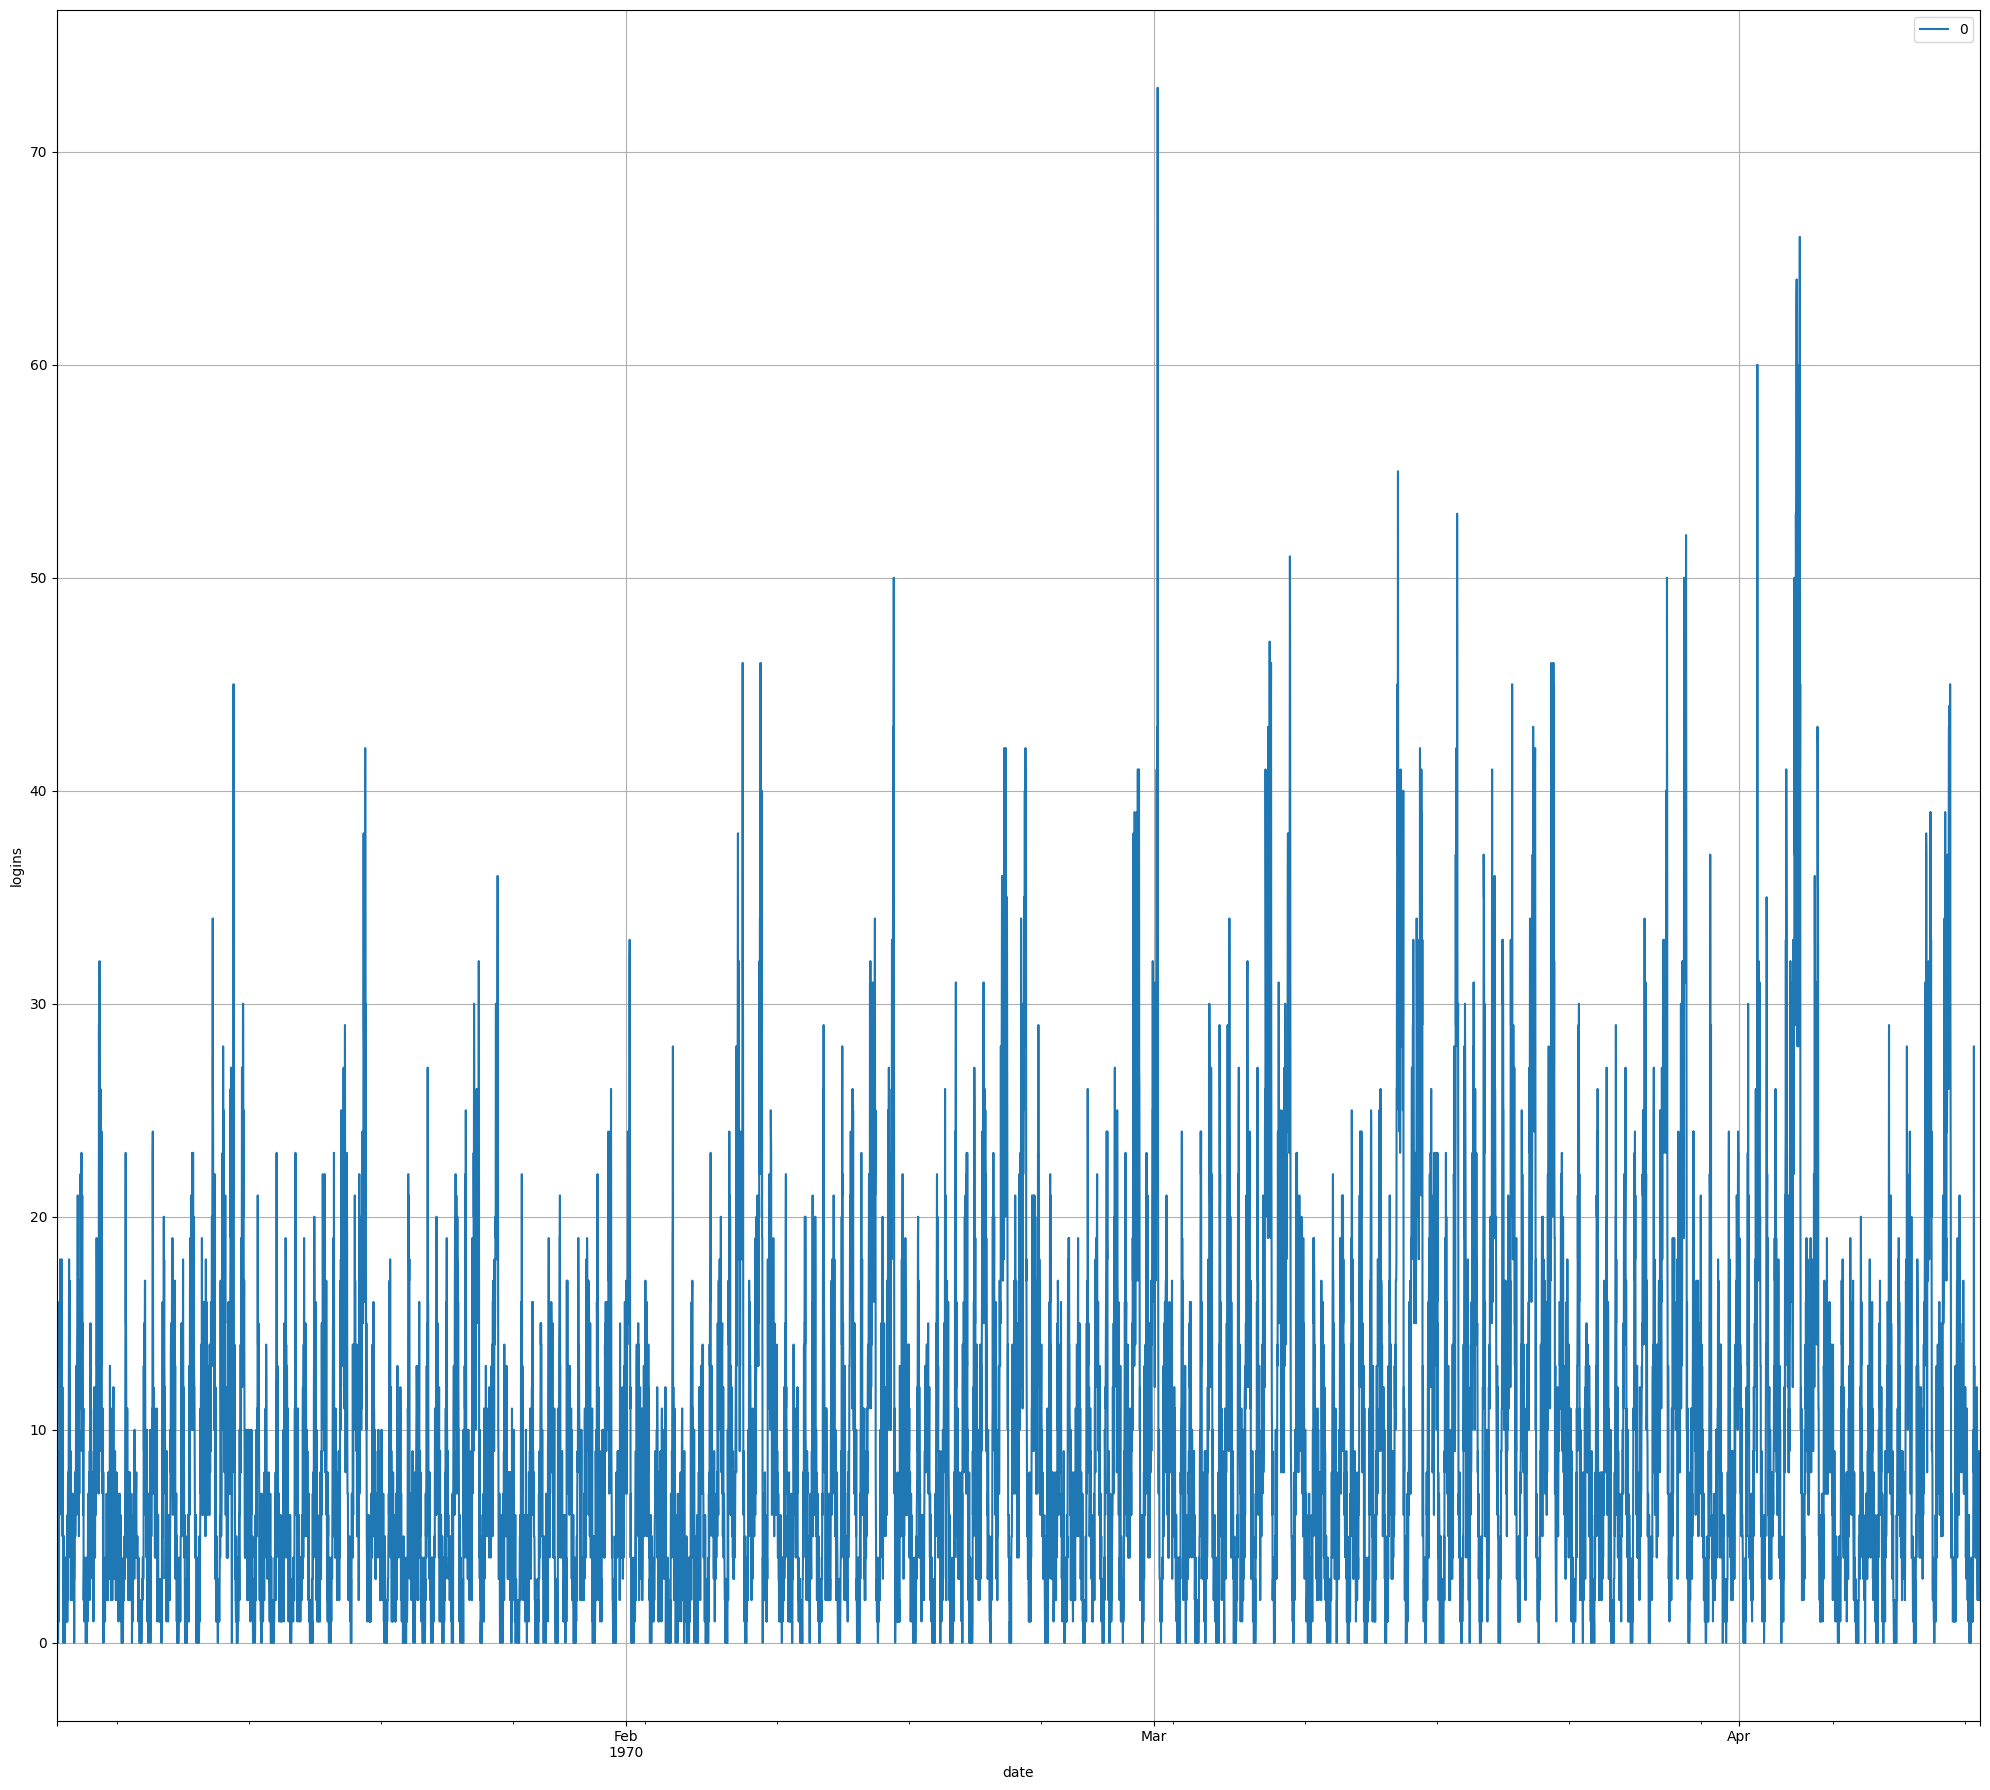

In [399]:
fig = plt.figure(figsize=(15,10))
data_agg.plot(grid=True)
plt.xlabel("date")
plt.ylabel("logins")
plt.tight_layout()
plt.plot()


### Daily

In [400]:
daily = pd.DataFrame(logins.groupby(pd.Grouper(freq='D')).size())
daily

,0
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
...,...
1970-04-09,818
1970-04-10,1009
1970-04-11,1352


[]

<Figure size 3000x2000 with 0 Axes>

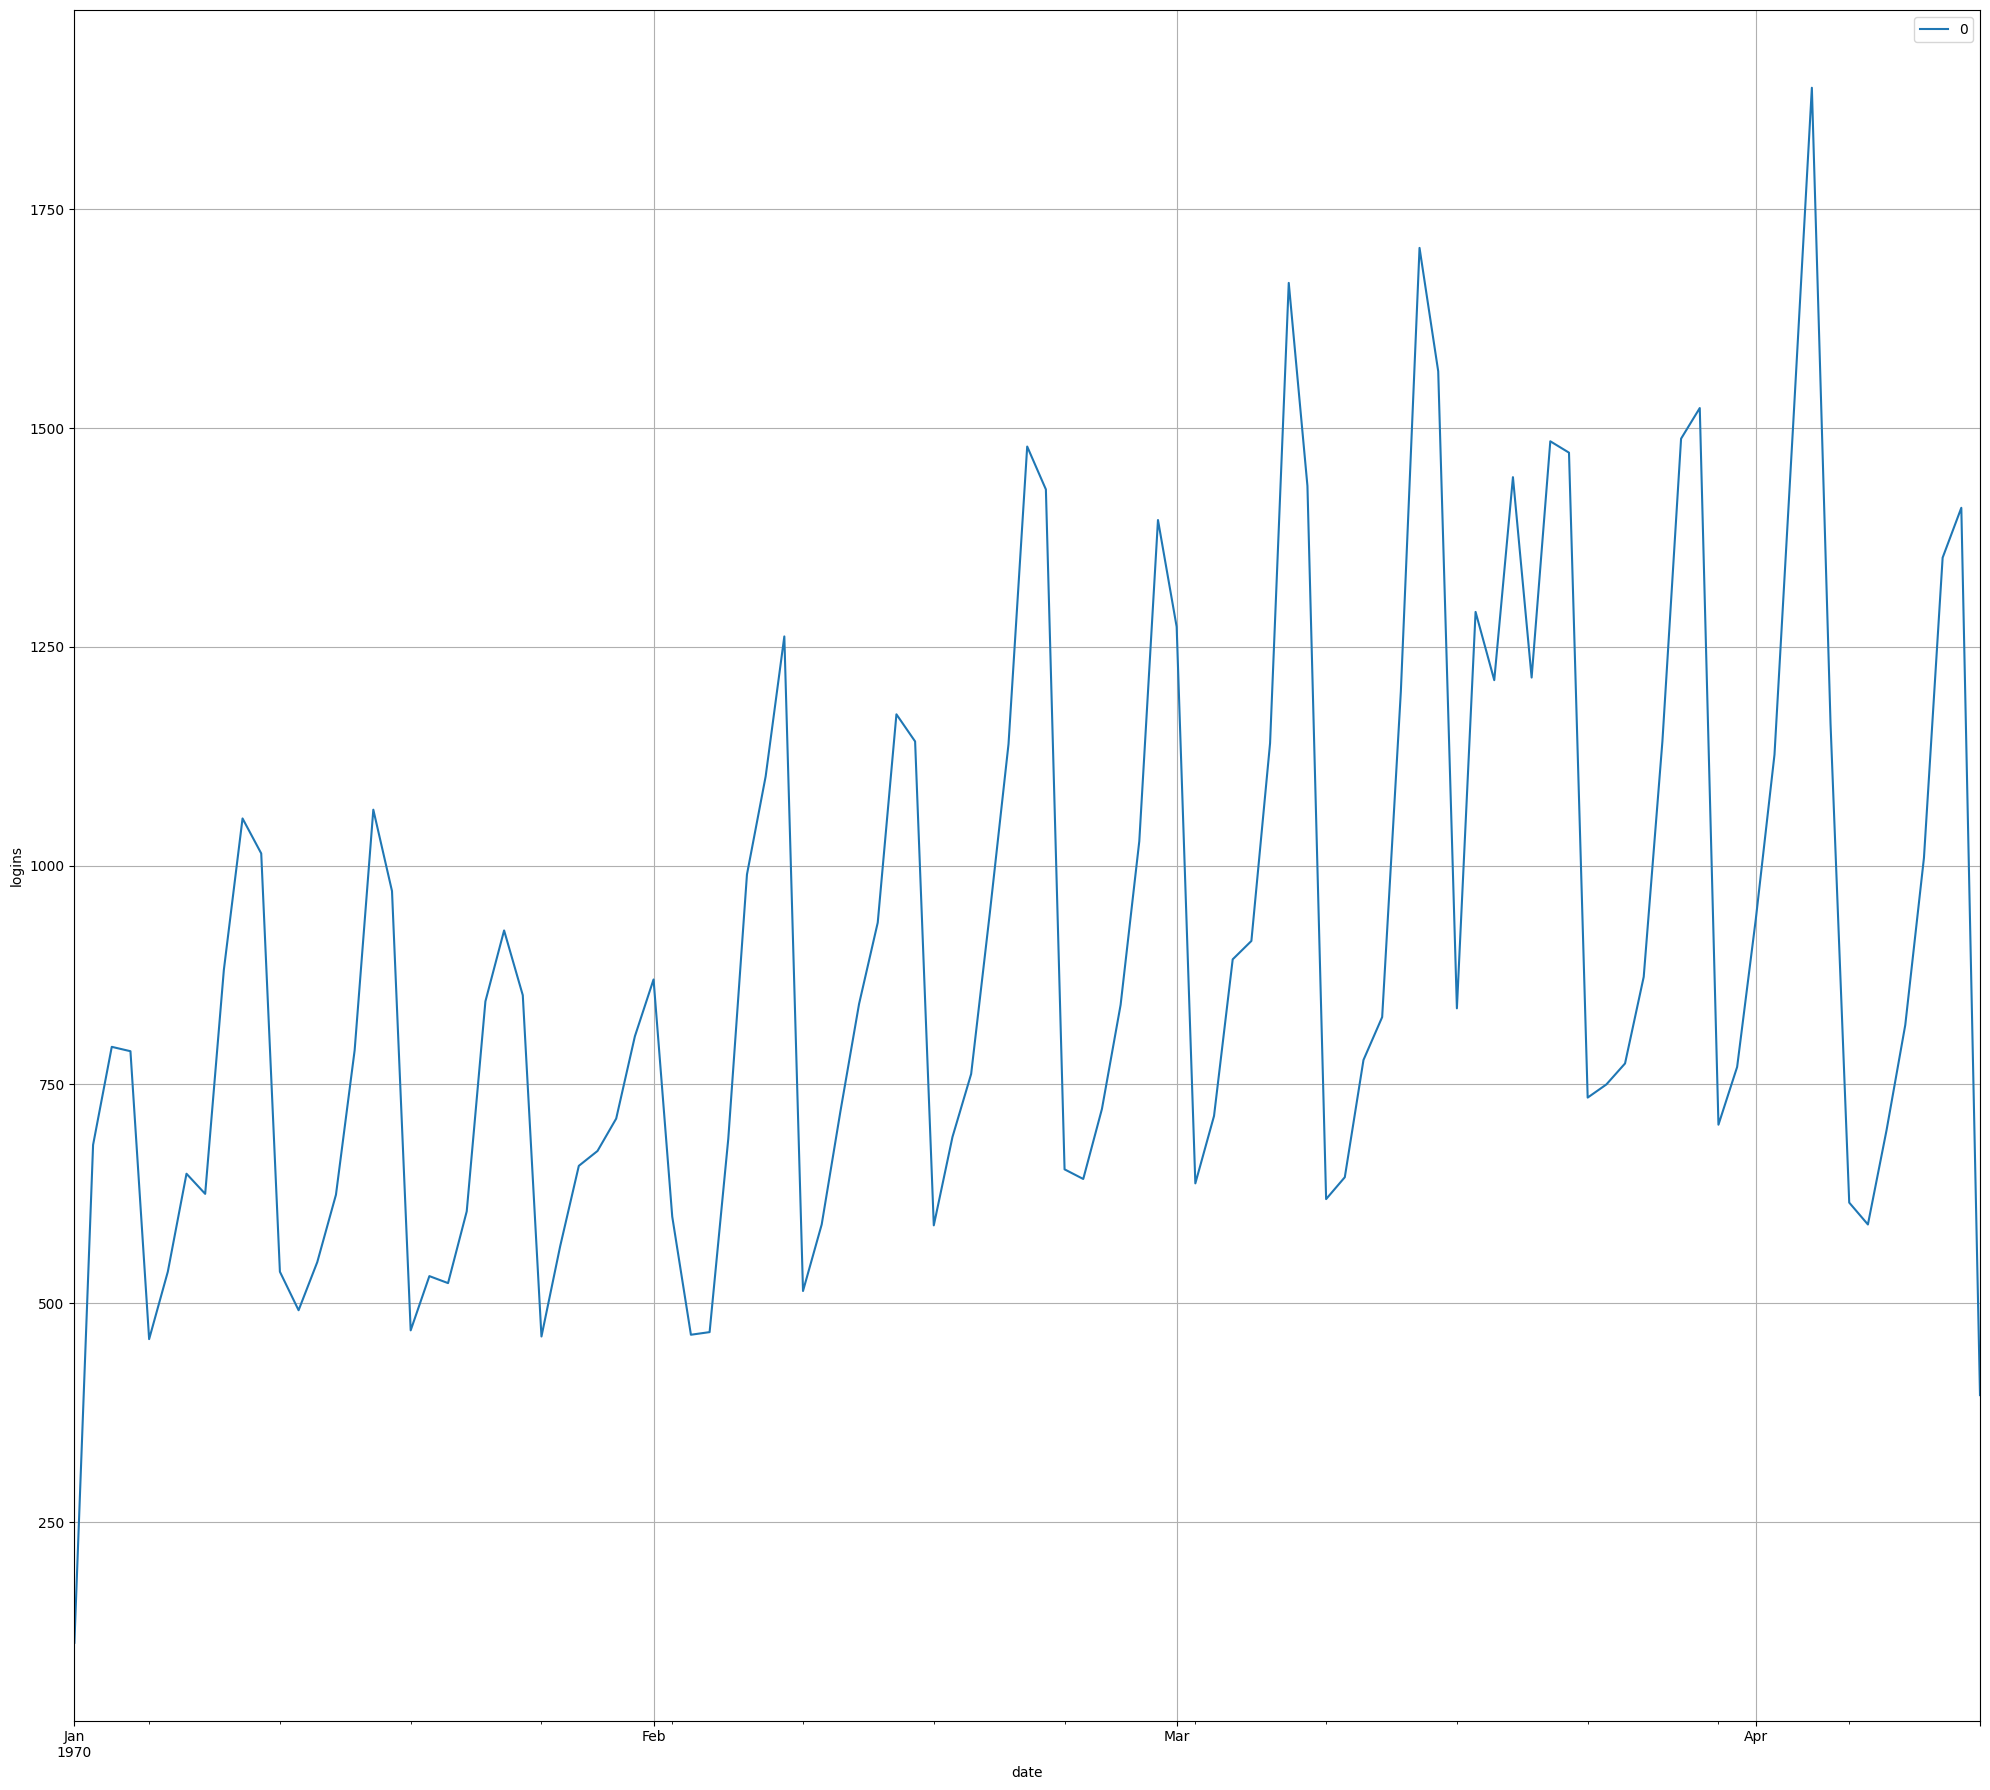

In [401]:
fig = plt.figure(figsize=(30,20))
daily.plot(grid=True)
plt.xlabel("date")
plt.ylabel("logins")
plt.tight_layout()
plt.plot()


Broken down into four core components: the average value, a trend (i.e. an increasing mean), seasonality (i.e. a repeating cyclical pattern), and a residual (random noise)

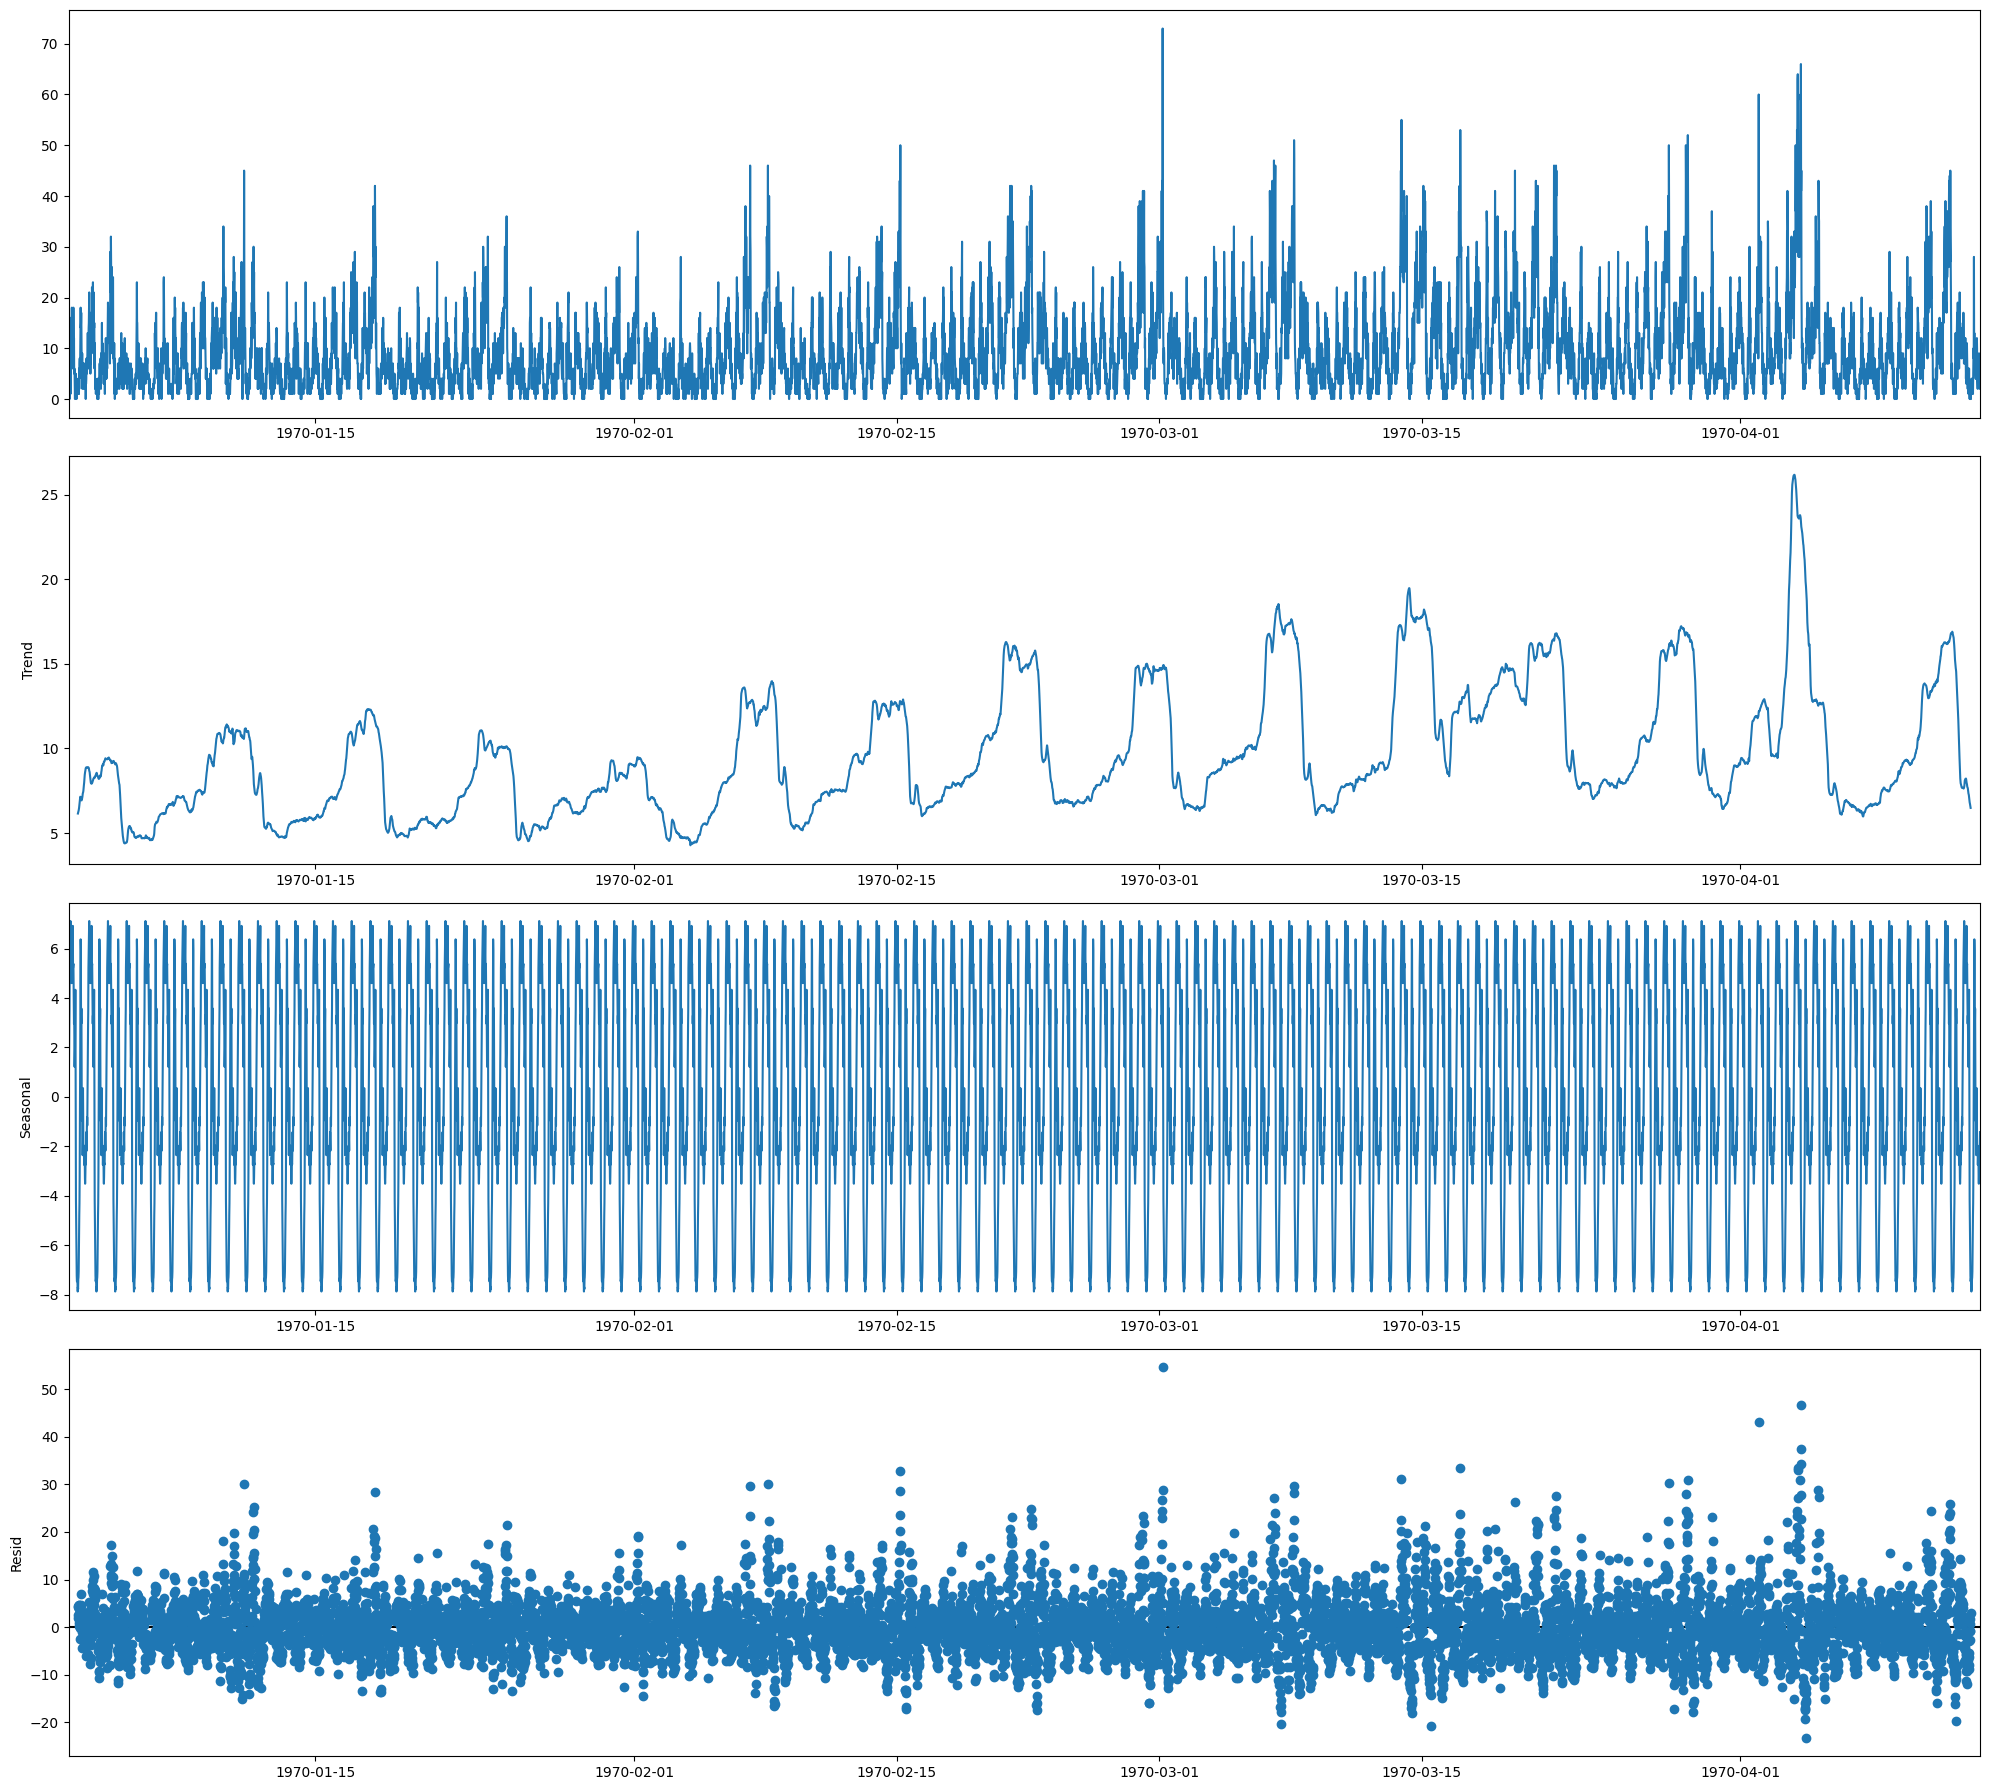

In [402]:
rcParams['figure.figsize'] = 20,18
decomp = sm.tsa.seasonal_decompose(data_agg, period=96, model = 'additive')
decomp.plot()
plt.show()

### Weekly 

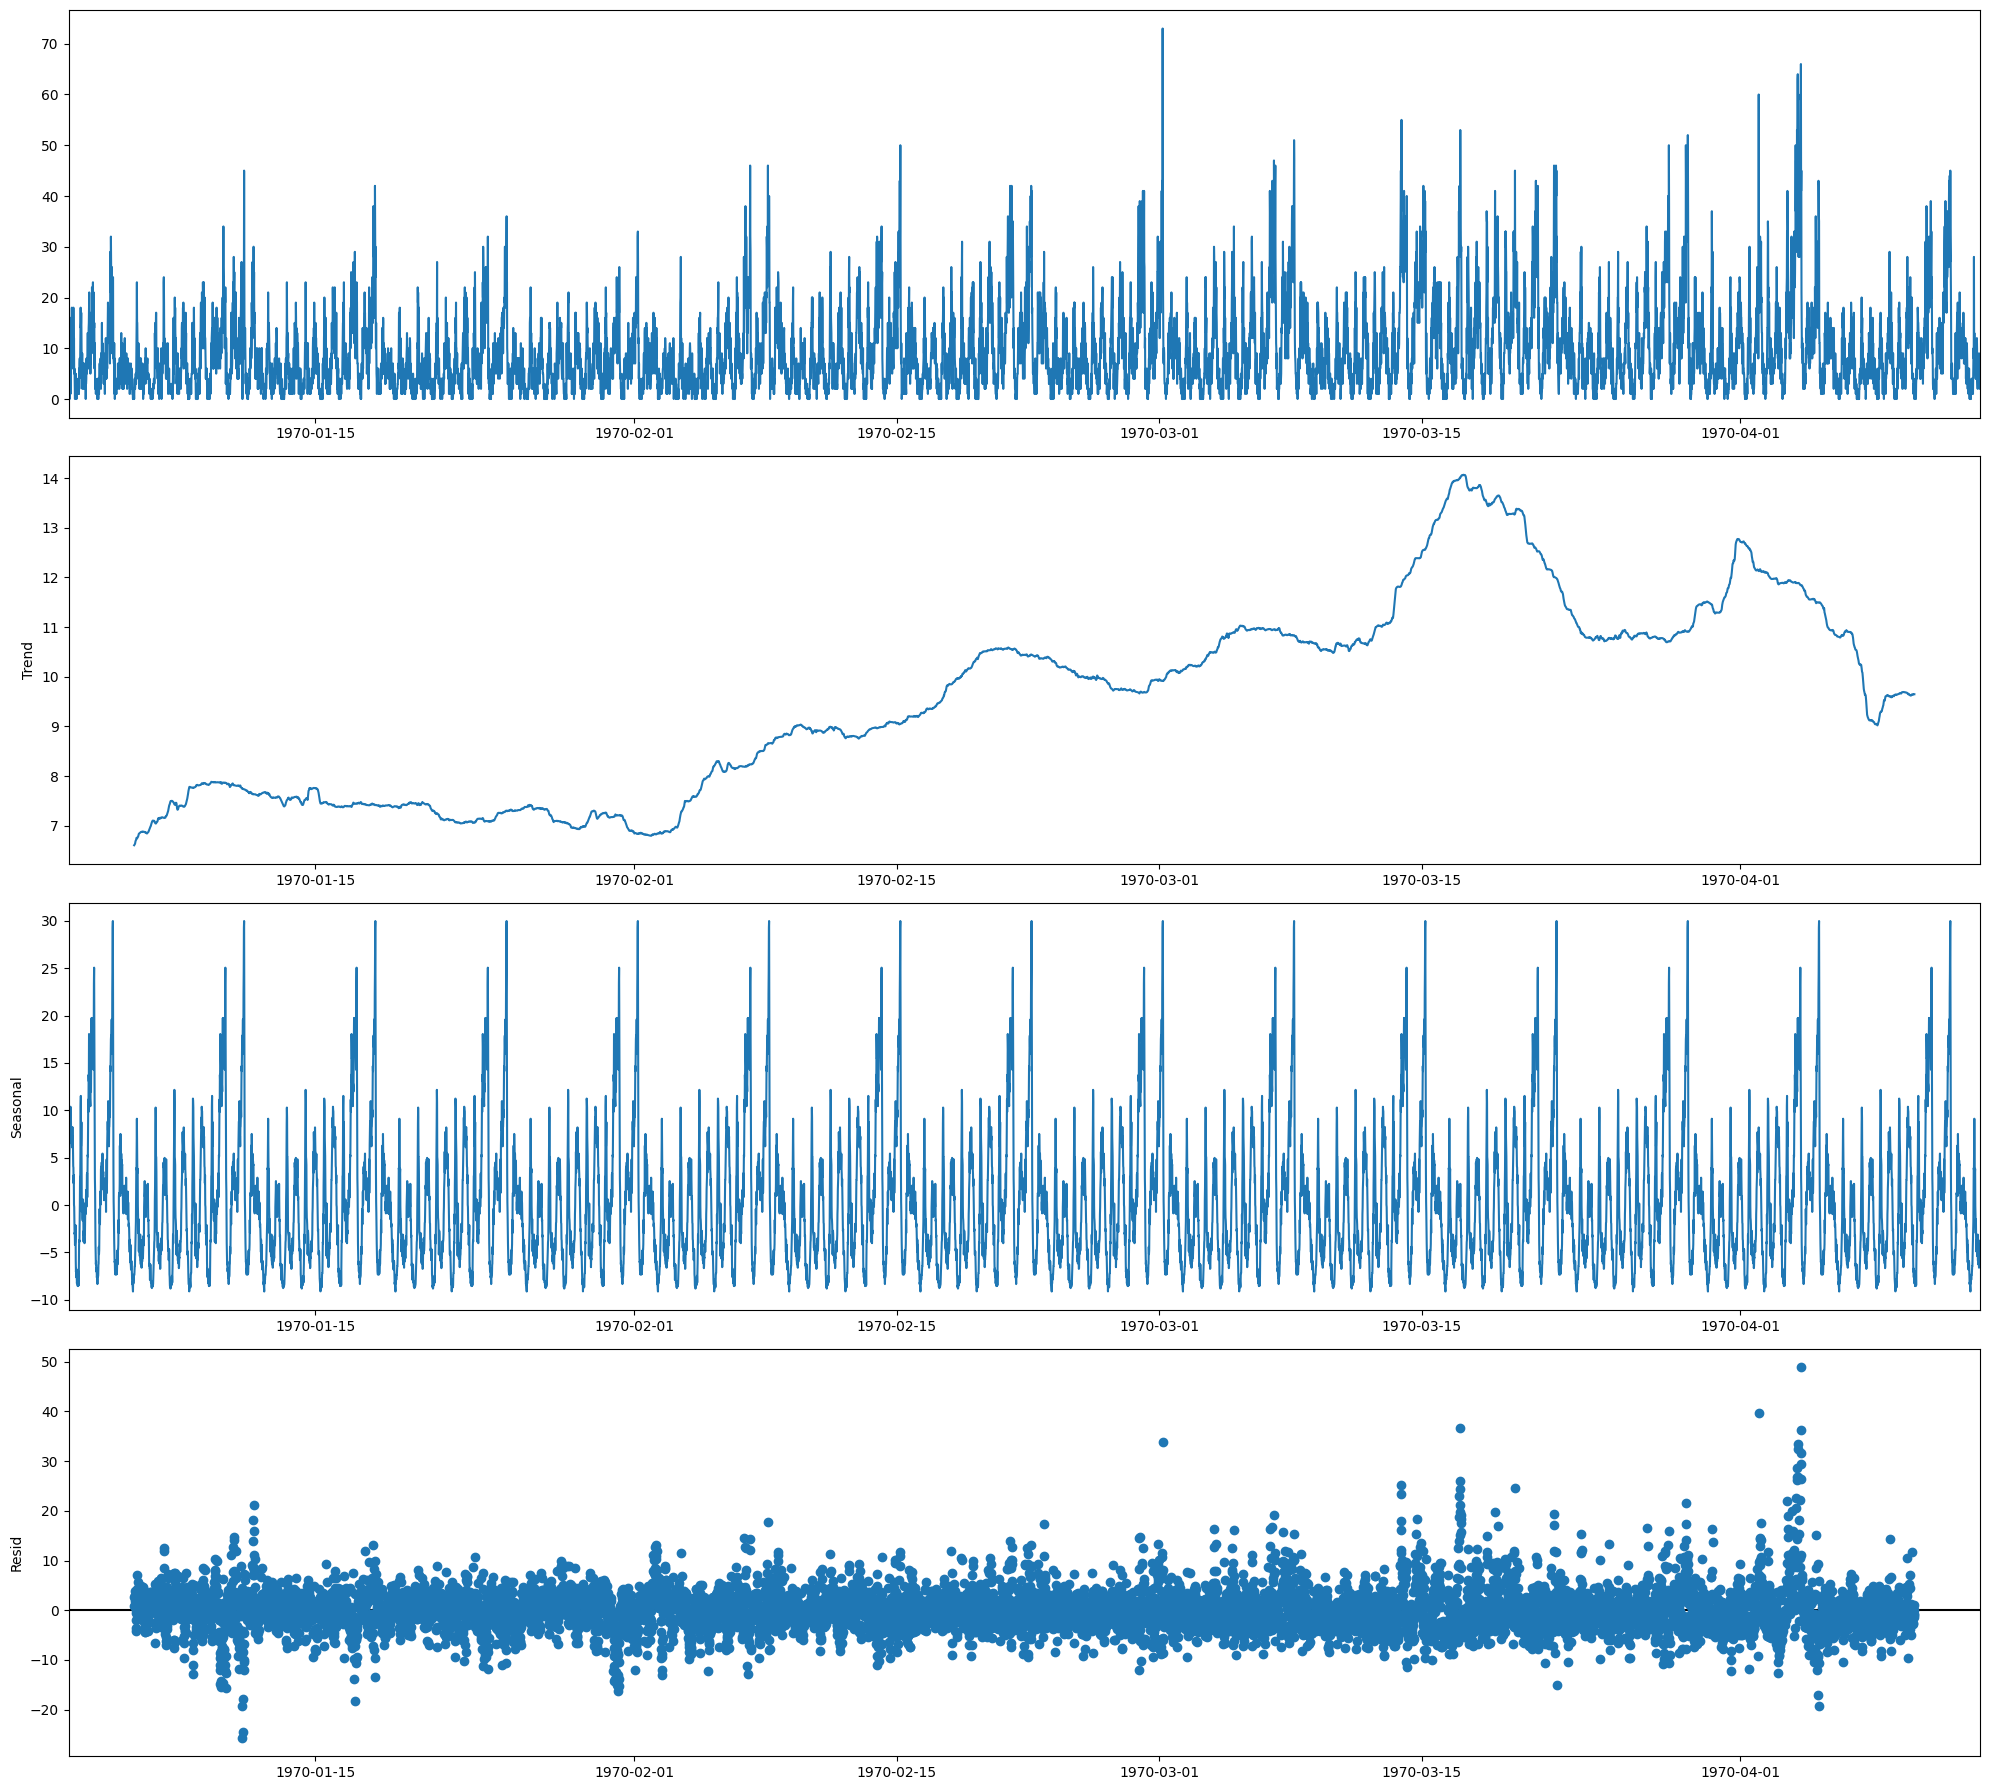

In [403]:
rcParams['figure.figsize'] = 20,18
decomp = sm.tsa.seasonal_decompose(data_agg, period=672, model = 'additive')
decomp.plot()
plt.show()

### Monthly

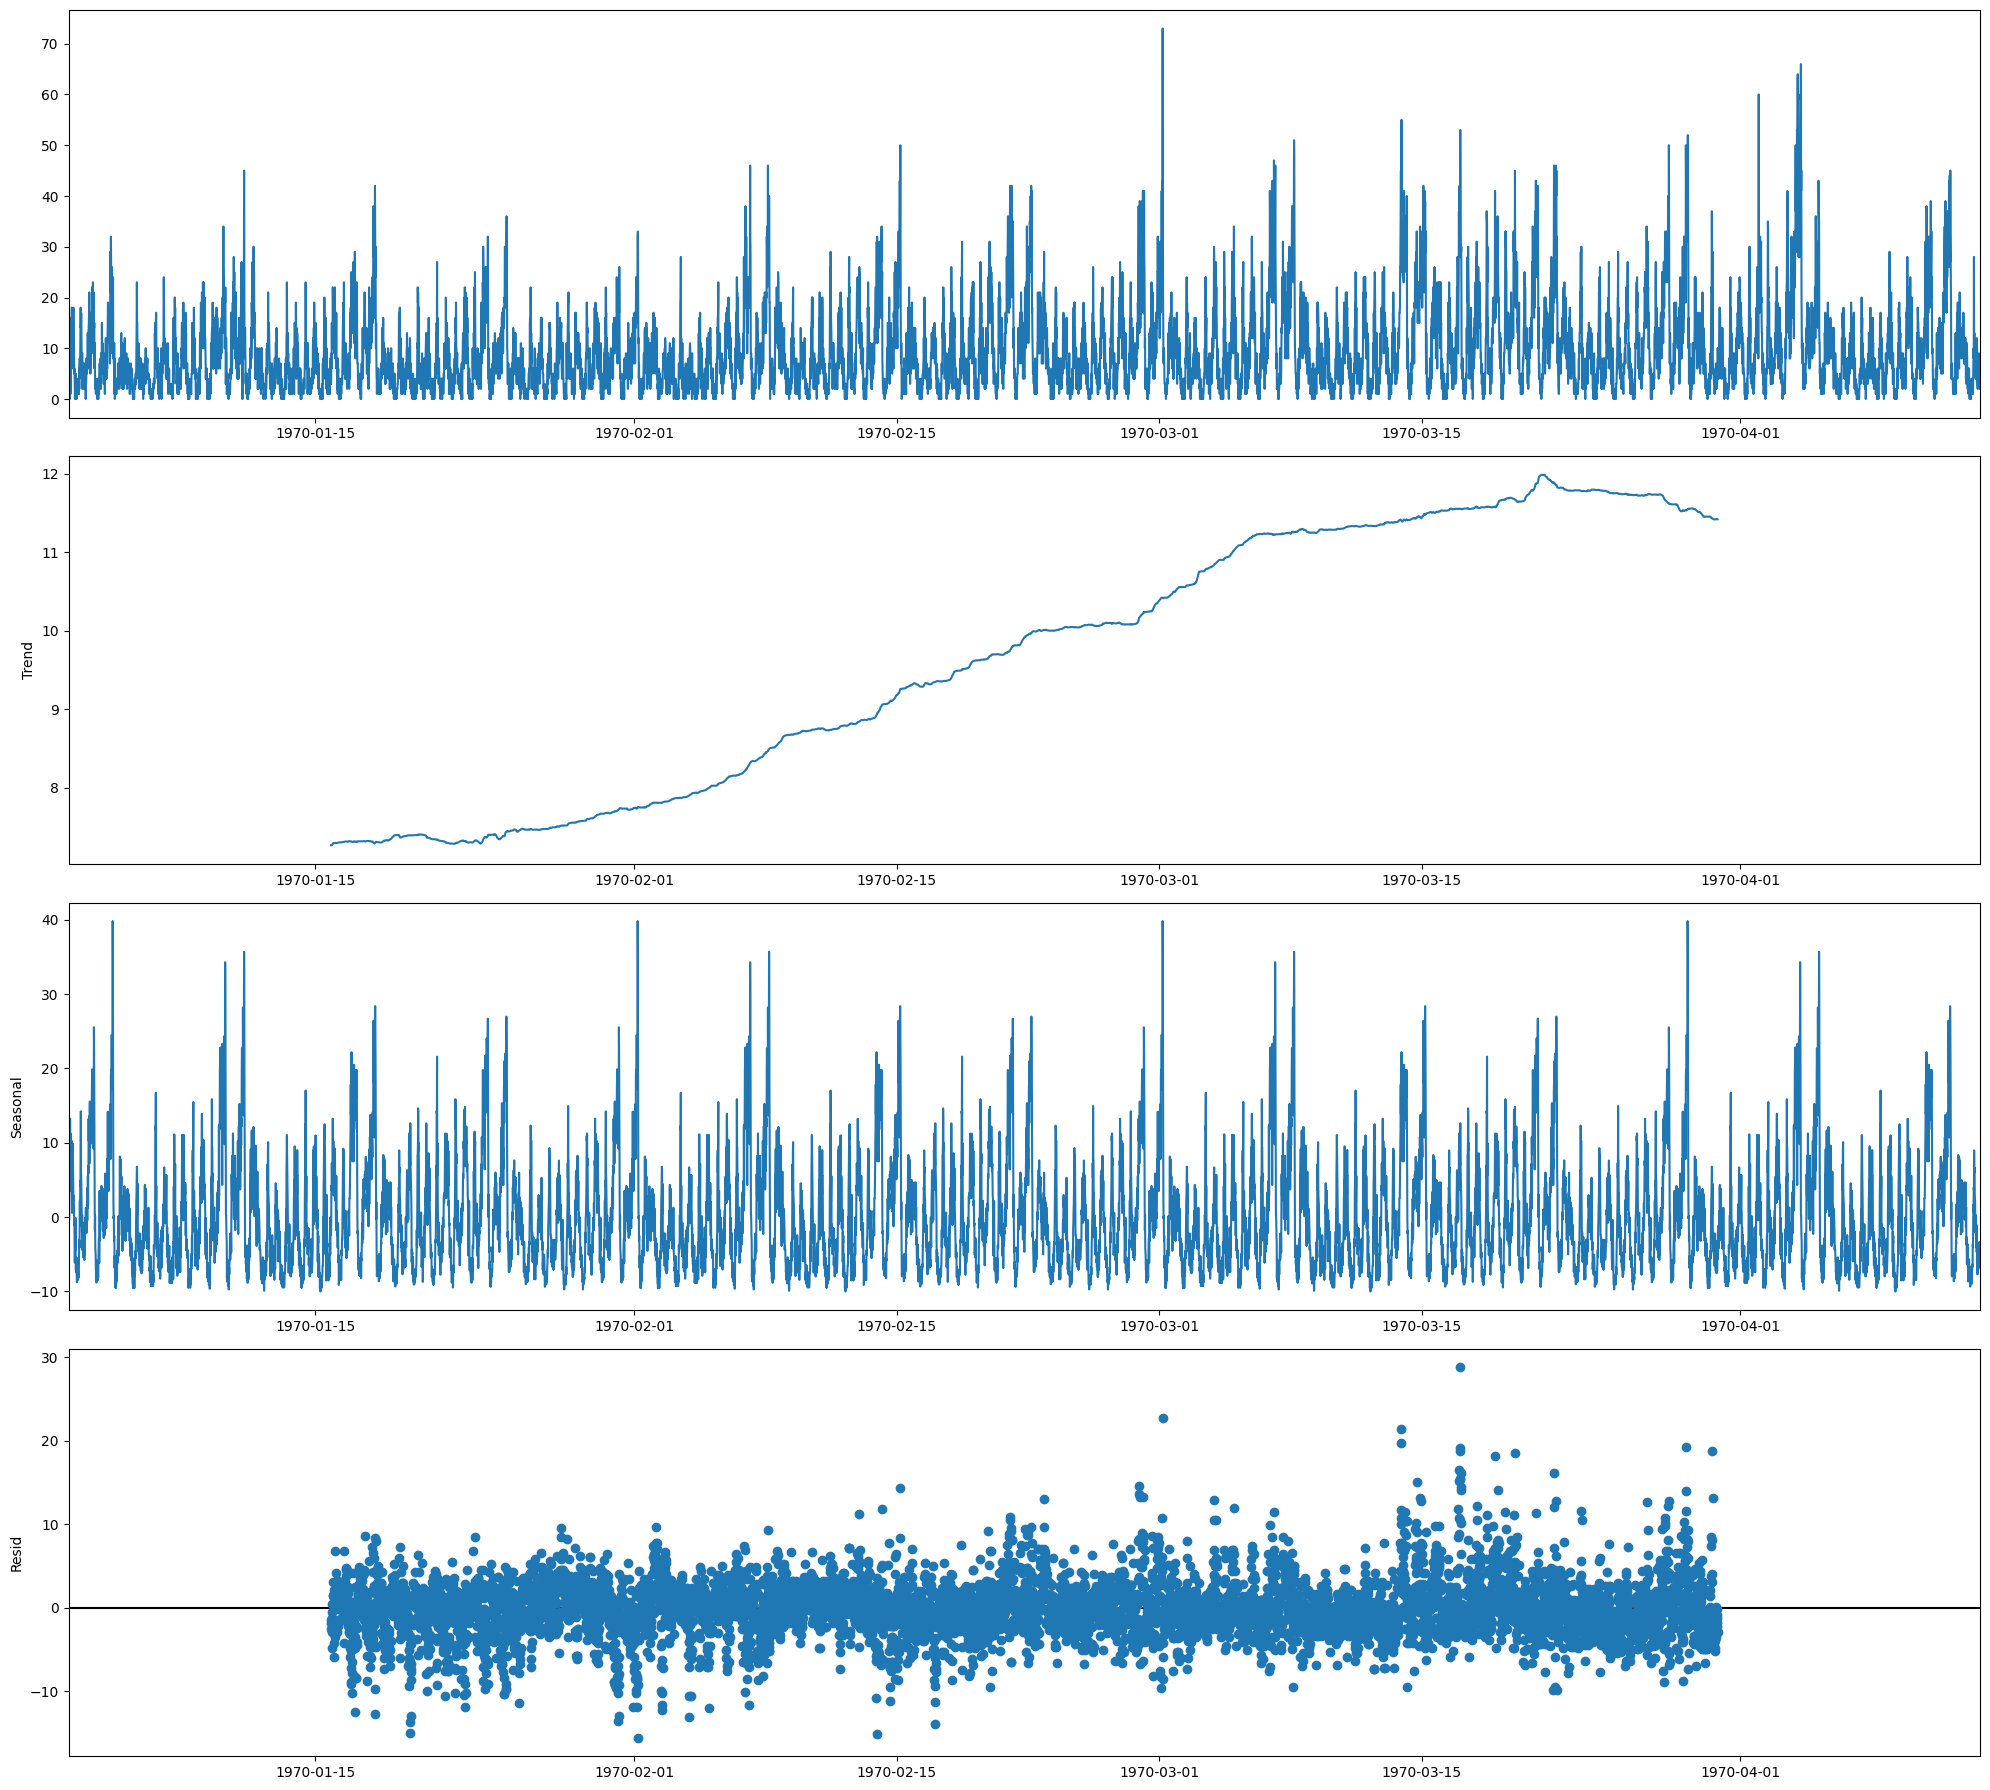

In [404]:
rcParams['figure.figsize'] = 20,18
decomp = sm.tsa.seasonal_decompose(data_agg, period=2688, model = 'additive')
decomp.plot()
plt.show()

### Findings

Logins steadily climb the first quarter and average logins peak in March. Logins tend to sore for the first few days of the week, tank mid week and slowly recover at the end of the week. 

## Part 2 - Experiment and Metric Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

#### 1. What is the key measure of success when ecouraging driver partners to be available in both Ultimate Gotham and Ultimate Metroplis and why?

Avergage total tool reimbursement counts for each city per day to account to view circadian rythm differences to measure if the program is being used. Average total completed trips per city. Aassuming there was a reimbursement and trip completion process to be eligible, this would only take into acount trips made in the two cities that were influenced by the program. 

### 2. How would you design and experiement to compare effectiveness of propsed change in relation to key measure of success:


a) Implementation

       * Data gathering:
              - Compile historical information about daily completed trips made and city of drop off and pick up for hopefully a couple years aggregated to account for seasonality and any trends. Perferably this would be in a table format for each driver, but an overall number calclulation would work just fine, but if more information was availabe, we could do further analysis on the drivers with the most intra-city trips. 

              - Create an average daily trips calculation for each city 
              - Implement reimbursement process and track daily reimbursements for each city on for the day the trip was made, not when the reimbursement was given. 

              - Continue to collect this data after implementing the program for at least a month for a long as experiement can run. 
       
b) Satistical Testing

       * Null hypothesis: The mean of the paired differences equals zero in the population.
       * Alternative hypothesis: The mean of the paired differences does not equal zero in the population.

       * Primary Evaluateion
              - The relationship between average completed daily assignments and compared to the same aggregated time period of previous years.
                - Paired Samples t-tests -calculates the difference between paired observations (e.g., before and after) and compares two related means.It tests the null hypothesis that the difference between two related means is 0 and then performs a 1-sample t-test on the differences.
                  
                - one-sided hypothesis tests use confidence intervals, which is more interpretable as you have a boundry of confidence. If the p-value is less than your significance level (e.g., 0.05), reject the null hypothesis. There is strong enough evidence to conclude that the mean paired difference does not equal zero in the population.


       * Secondary Evaluation
              - Noticable trends reimbursement increases over the experiement period. This can also be done with a paired T-test of the previous days, weeks, months etc. 


c)Results and Reccomnedations

       * If statisitcal significance is found in the p-values of both evaluations, recommend extending the program for as long as the required or the budget allows. 
       * If overadoption strains resources, consider making the reimbursement program an incentive offering for reaching a certain amount of daily intra-city trips.  

## Part 3 - Rider Retention Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

### Data Description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

### Import libraries

In [451]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.ensemble import RandomForestClassifier


### Read data

In [406]:
riders = pd.read_json('../ultimate_challenge/ultimate_data_challenge.json')

### Cleaning

In [407]:
riders

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [408]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Missing values

The missing rating features were imputed with mean to compare with the rest of the sample. Missing phone number was replaced with 0 to signify no device type entered. 

In [409]:
riders['avg_rating_of_driver'].fillna(int(riders['avg_rating_of_driver'].mean()), inplace=True)

In [410]:
riders['avg_rating_by_driver'].fillna(int(riders['avg_rating_by_driver'].mean()), inplace=True)

In [411]:
riders['phone'].fillna('0', inplace= True)

In [412]:
riders['phone'].value_counts()

iPhone     34582
Android    15022
0            396
Name: phone, dtype: int64

### Feature engineering

Sign-up date and last trip date to datetime

In [413]:
riders['signup_date'] =  pd.to_datetime(riders['signup_date'], infer_datetime_format=True)


In [414]:
riders['last_trip_date'] =  pd.to_datetime(riders['last_trip_date'], infer_datetime_format=True)

surge percent to float

In [415]:
riders['surge_pct'] = pd.to_numeric(riders['surge_pct'],errors = 'coerce')

## Target variable 'retained'

A customer is considered "retained" when their status is "active" in preceding 30 days. We need to create a binary feature in the table that indicates if the rider has meet this retained user criteria.

"retained" df of riders who's most current last_trip_date is greater than 30days last_trip_date max.

In [417]:
retained_max = riders['last_trip_date'].max()
retained_min = retained_max - timedelta(days=30)
retained = riders.loc[(riders['last_trip_date'] <= retained_max) & (riders['last_trip_date'] >= retained_min)]

Convert dateime columns to count of days since current date for both signup dates and last trip dates. This needs to happen to account for this information in the model. 

In [418]:
riders['signup_date_days'] = datetime.now() - riders.signup_date
riders['signup_date_days'] = riders['signup_date_days'].dt.days
riders['last_trip_date_days'] = datetime.now() - riders.last_trip_date  
riders['last_trip_date_days'] = riders['last_trip_date_days'].dt.days
riders = riders.drop(columns=riders.select_dtypes(['datetime']).columns)

Asigning the column 'retained' with 0. If the rider is included in the 'retained' df that was created earlier, assign it a 1 to signify true. The riders is identified "retained"

In [419]:
riders['retained'] = 0
riders.loc[riders.index.isin(retained.index), 'retained'] = 1


In [420]:
riders

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_date_days,last_trip_date_days,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,3160,3017,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,3156,3060,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,3179,3178,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,3175,3005,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,3158,3111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,3160,3029,1
49996,Astapor,1,4.0,1.00,iPhone,0.0,False,0.0,0.00,4.0,3161,3160,0
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,3154,3043,0
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,3171,3170,0


In [421]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  signup_date_days        50000 non-null  int64  
 11  last_trip_date_days     50000 non-null  int64  
 12  retained                50000 non-null  int64  
dtypes: bool(1), float64(6), int64(4), object(2)
memory usage: 4.6+ MB


### EDA

What fraction of users were retained?

In [422]:
counts = riders['retained'].value_counts()/len(riders)

In [423]:
counts

0    0.62392
1    0.37608
Name: retained, dtype: float64

<AxesSubplot:ylabel='retained'>

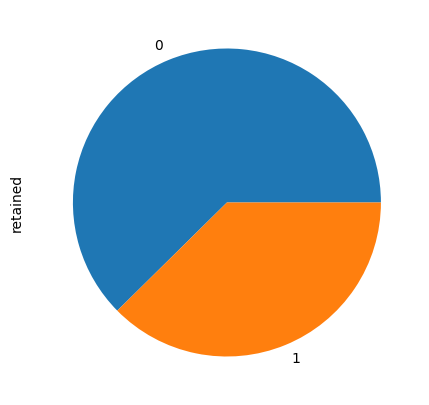

In [424]:
counts.plot.pie(figsize=(5, 5))

37.61% of users were retained.

#### Categoricals

Text(0.5, 1.0, 'Retained Users by City')

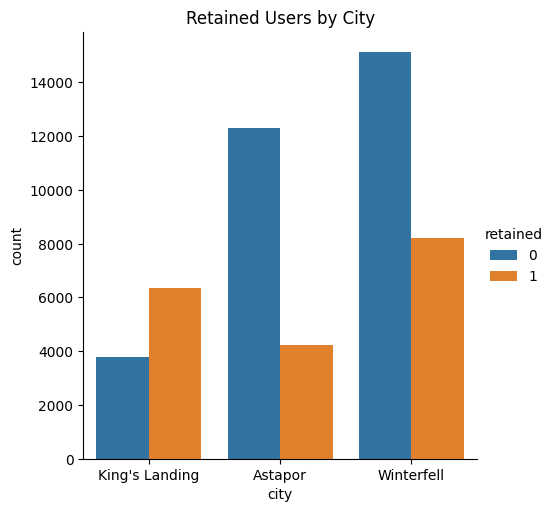

In [425]:
sns.catplot(x = 'city', data=riders, kind='count', hue='retained')
plt.title('Retained Users by City')

Text(0.5, 1.0, 'Retained Users by Device')

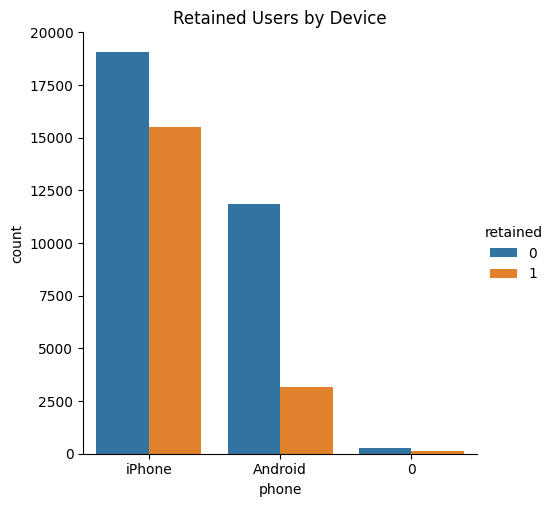

In [426]:
sns.catplot(x = 'phone', data=riders, kind='count', hue='retained')
plt.title('Retained Users by Device')

Text(0.5, 1.0, 'Retained Users by Premium Service')

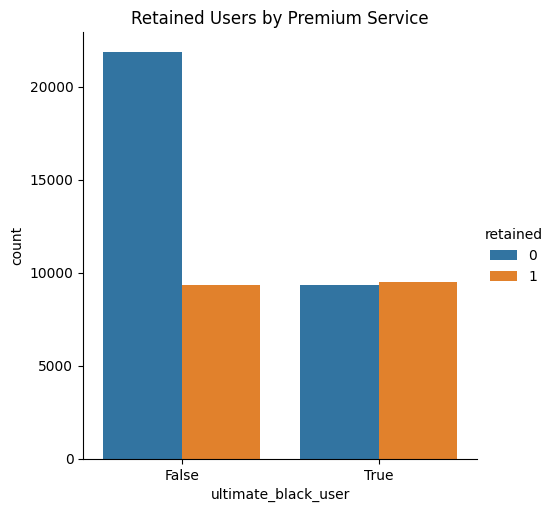

In [439]:
sns.catplot(x = 'ultimate_black_user', data=riders, kind='count', hue='retained')
plt.title('Retained Users by Premium Service')

#### Numericals

In [428]:
numericals = riders.select_dtypes(include = ['int', 'float']).copy()
numericals.head().T

,0,1,2,3,4
trips_in_first_30_days,4.00,0.00,3.00,9.00,14.00
avg_rating_of_driver,4.70,5.00,4.30,4.60,4.40
avg_surge,1.10,1.00,1.00,1.14,1.19
surge_pct,15.40,0.00,0.00,20.00,11.80
weekday_pct,46.20,50.00,100.00,80.00,82.40
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5.00,5.00,5.00,4.90,4.90
signup_date_days,3160.00,3156.00,3179.00,3175.00,3158.00
last_trip_date_days,3017.00,3060.00,3178.00,3005.00,3111.00
retained,1.00,0.00,0.00,1.00,0.00


array([[<AxesSubplot:title={'center':'trips_in_first_30_days'}>,
        <AxesSubplot:title={'center':'avg_rating_of_driver'}>,
        <AxesSubplot:title={'center':'avg_surge'}>],
       [<AxesSubplot:title={'center':'surge_pct'}>,
        <AxesSubplot:title={'center':'weekday_pct'}>,
        <AxesSubplot:title={'center':'avg_dist'}>],
       [<AxesSubplot:title={'center':'avg_rating_by_driver'}>,
        <AxesSubplot:title={'center':'signup_date_days'}>,
        <AxesSubplot:title={'center':'last_trip_date_days'}>],
       [<AxesSubplot:title={'center':'retained'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

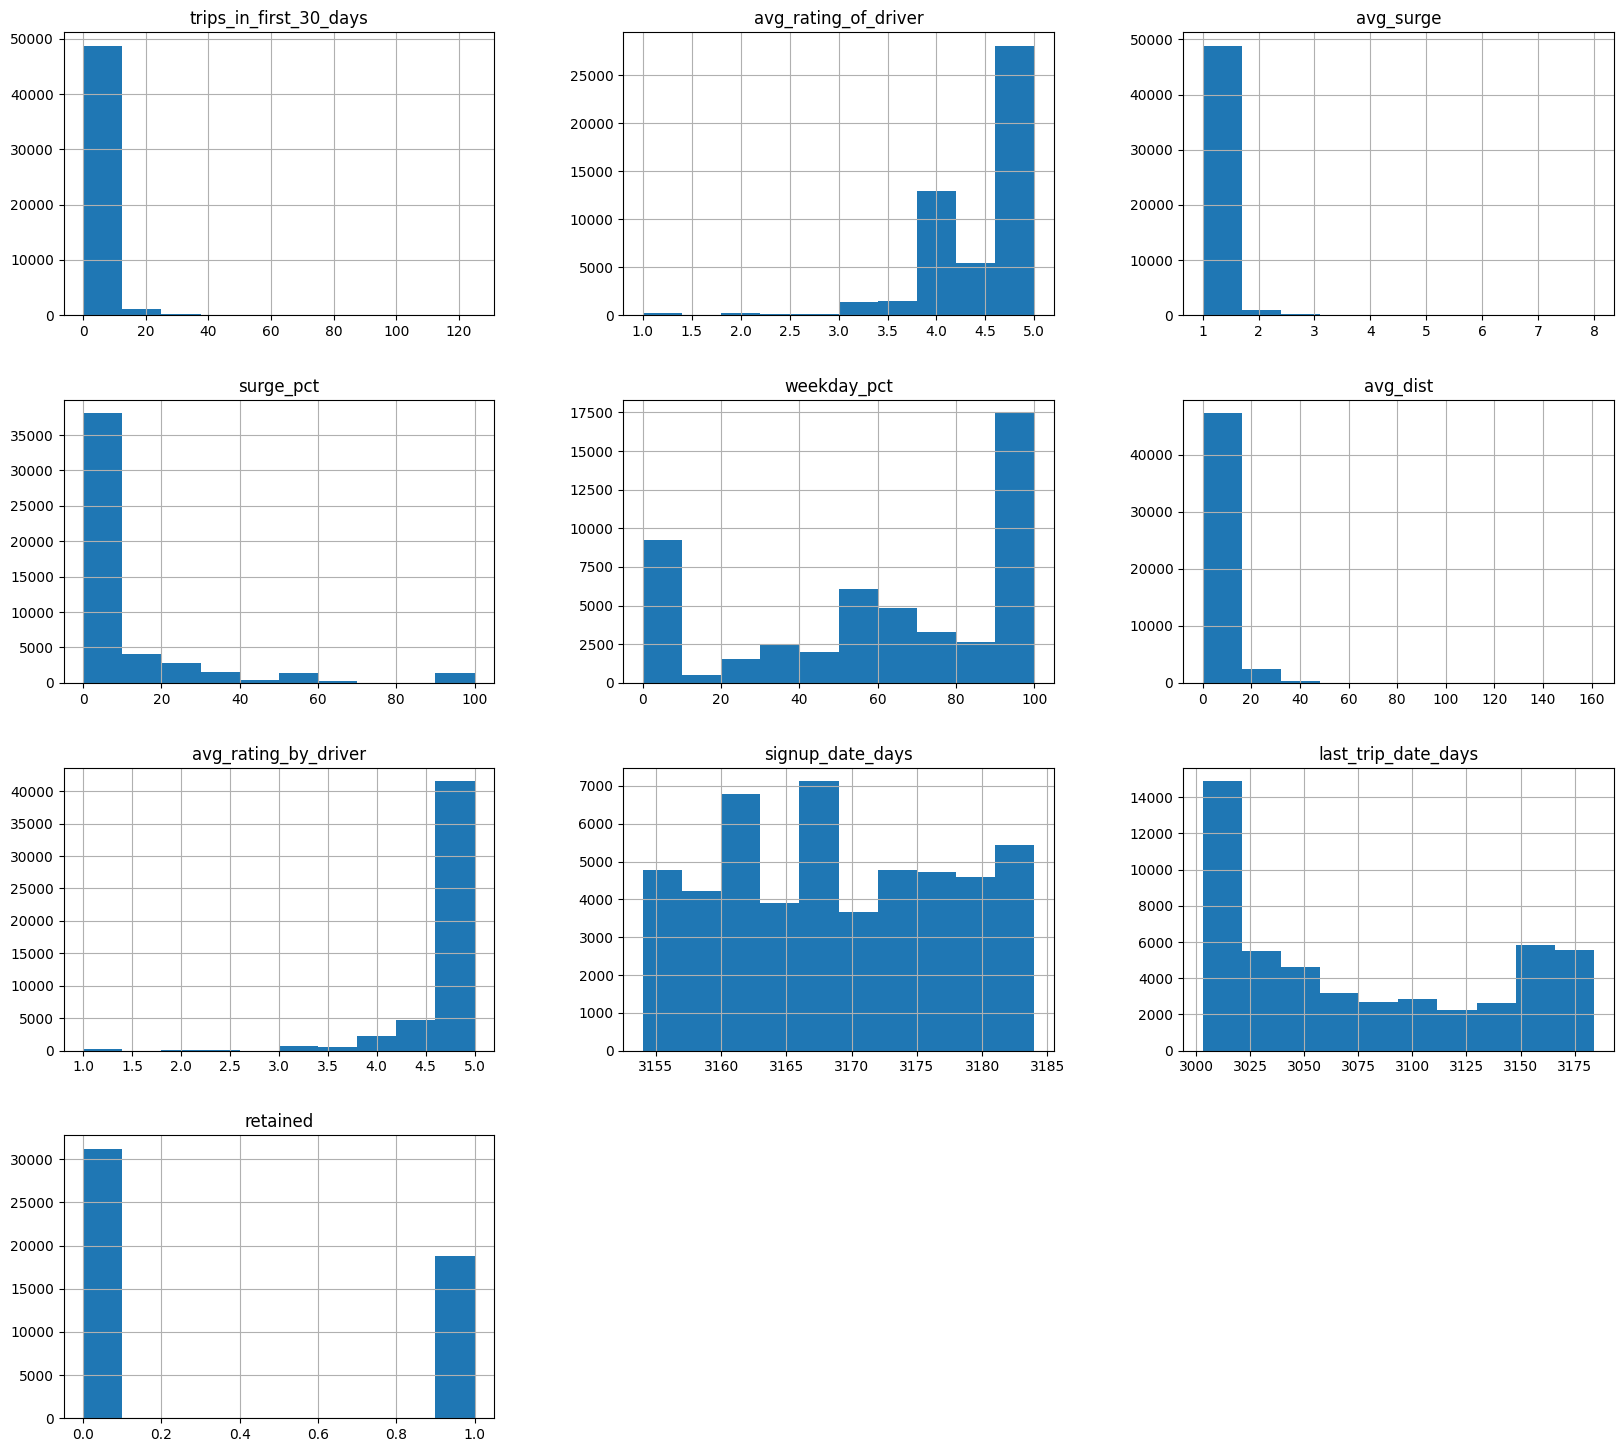

In [429]:
numericals.hist()

Text(0.5, 1.0, 'Trips in First 30 Days by Retention')

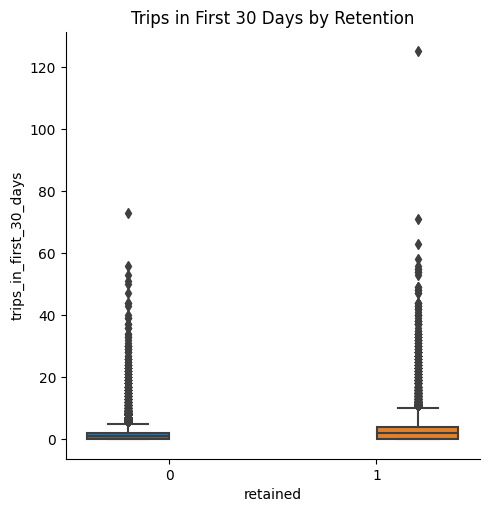

In [430]:
sns.catplot(x = 'retained', y = 'trips_in_first_30_days', data=riders, kind='box', hue='retained')
plt.title('Trips in First 30 Days by Retention')

Text(0.5, 1.0, 'Trips in First 30 Days by Retention')

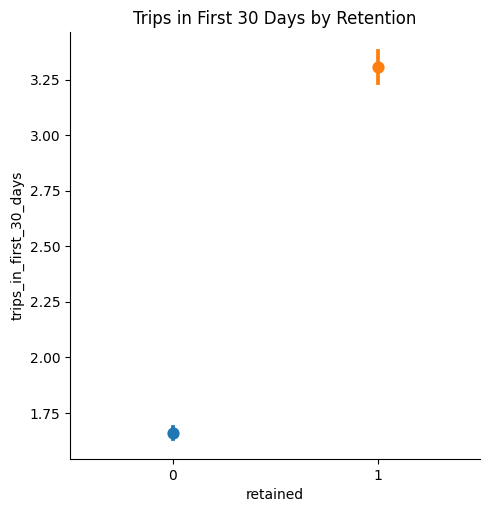

In [440]:
sns.catplot(x = 'retained', y = 'trips_in_first_30_days', data=riders, kind='point', hue='retained')
plt.title('Trips in First 30 Days by Retention')

Text(0.5, 1.0, 'Avg Rating of Driver by Retention')

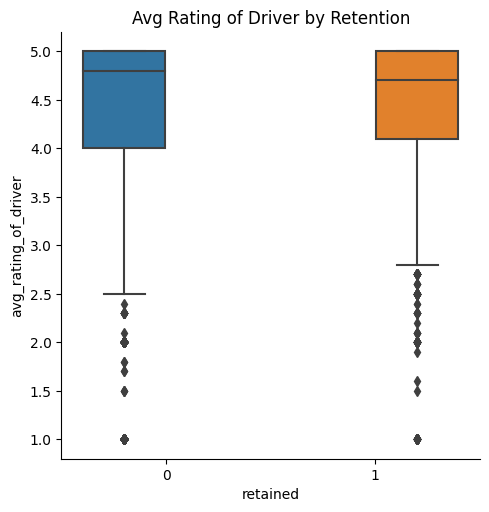

In [431]:
sns.catplot(x = 'retained', y = 'avg_rating_of_driver', data=riders, kind='box', hue='retained')
plt.title('Avg Rating of Driver by Retention')

Text(0.5, 1.0, 'Avg Rating of Driver by Retention')

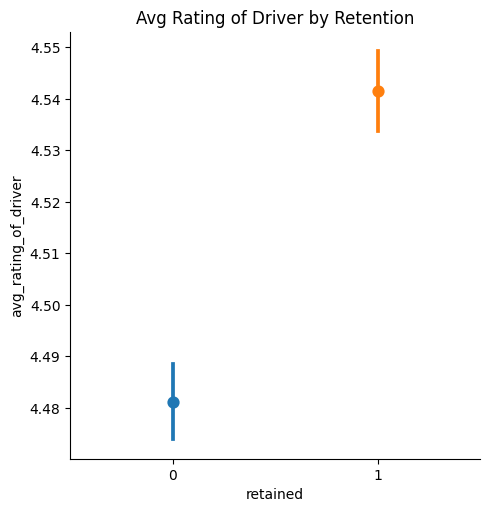

In [441]:
sns.catplot(x = 'retained', y = 'avg_rating_of_driver', data=riders, kind='point', hue='retained')
plt.title('Avg Rating of Driver by Retention')

Text(0.5, 1.0, 'Avg Surge by Retention')

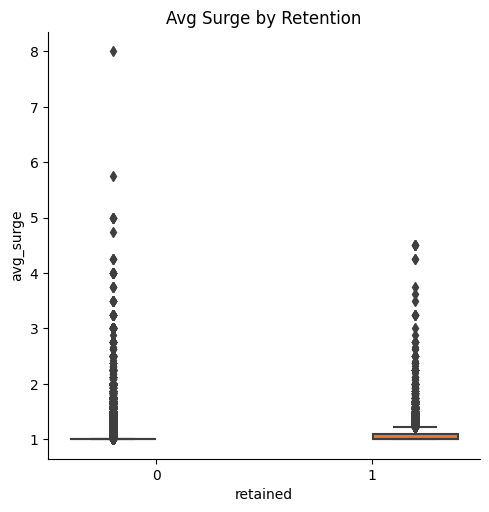

In [432]:
sns.catplot(x = 'retained', y = 'avg_surge', data=riders, kind='box', hue='retained')
plt.title('Avg Surge by Retention')

Text(0.5, 1.0, 'Avg Surge by Retention')

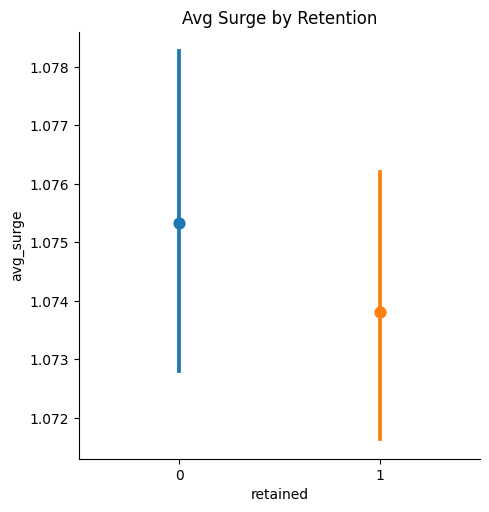

In [443]:
sns.catplot(x = 'retained', y = 'avg_surge', data=riders, kind='point', hue='retained')
plt.title('Avg Surge by Retention')

Text(0.5, 1.0, 'Surge Percent by Rentention')

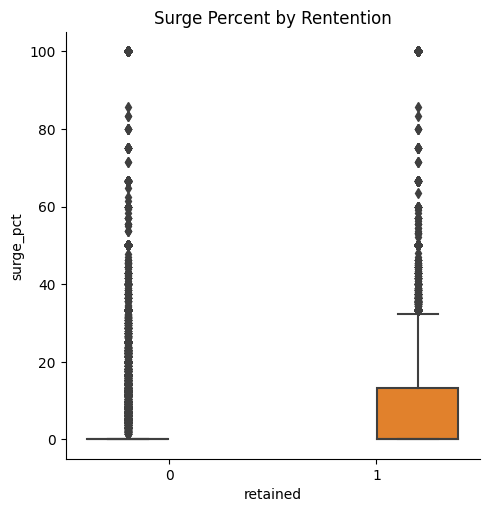

In [433]:
sns.catplot(x = 'retained', y = 'surge_pct', data=riders, kind='box', hue='retained')
plt.title('Surge Percent by Rentention')

Text(0.5, 1.0, 'Surge Percent by Rentention')

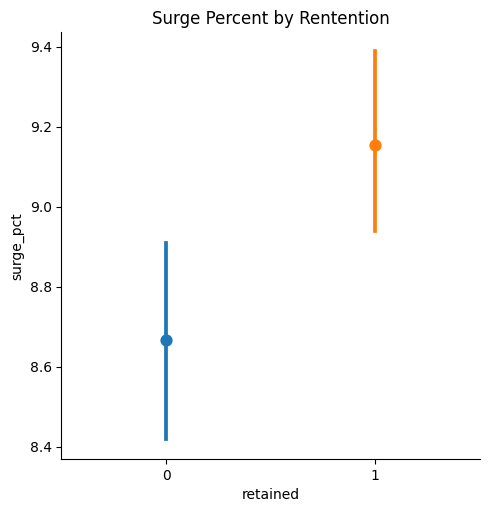

In [444]:
sns.catplot(x = 'retained', y = 'surge_pct', data=riders, kind='point', hue='retained')
plt.title('Surge Percent by Rentention')

Text(0.5, 1.0, 'Weekday Percent by Retention')

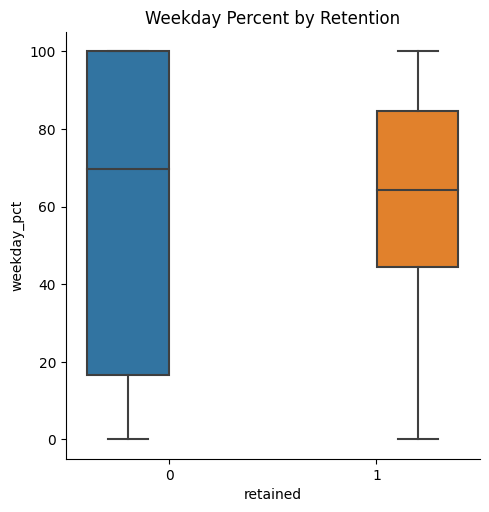

In [434]:
sns.catplot(x = 'retained', y = 'weekday_pct', data=riders, kind='box', hue='retained')
plt.title('Weekday Percent by Retention')

Text(0.5, 1.0, 'Weekday Percent by Retention')

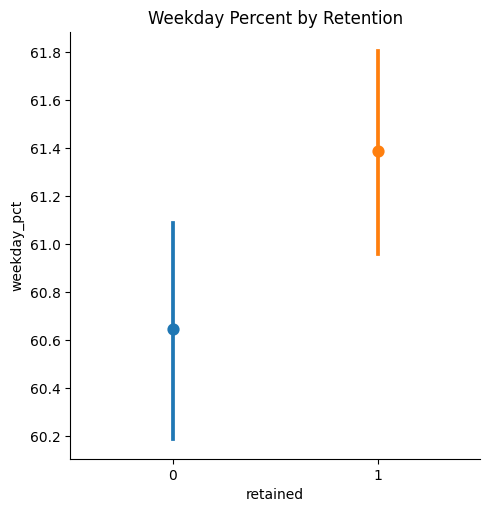

In [445]:
sns.catplot(x = 'retained', y = 'weekday_pct', data=riders, kind='point', hue='retained')
plt.title('Weekday Percent by Retention')

Text(0.5, 1.0, 'Avg Distance in Miles by Retention')

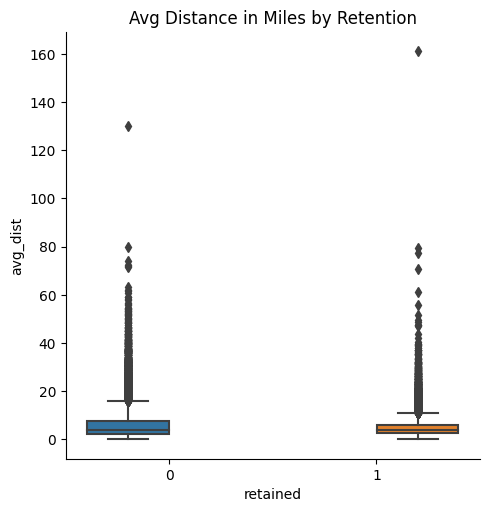

In [435]:
sns.catplot(x = 'retained', y = 'avg_dist', data=riders, kind='box', hue='retained')
plt.title('Avg Distance in Miles by Retention')

Text(0.5, 1.0, 'Avg Distance in Miles by Retention')

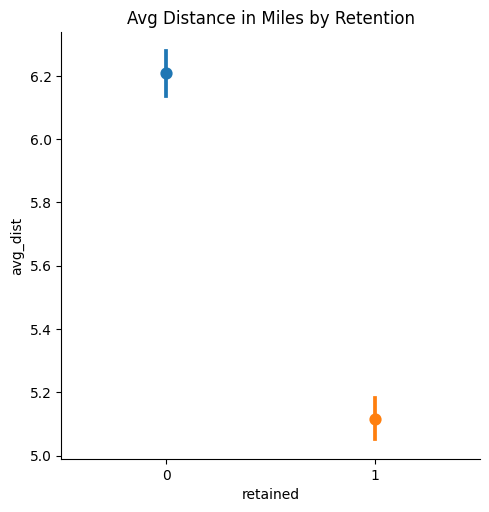

In [446]:
sns.catplot(x = 'retained', y = 'avg_dist', data=riders, kind='point', hue='retained')
plt.title('Avg Distance in Miles by Retention')

Text(0.5, 1.0, 'Avg Rating by Driver by Retention')

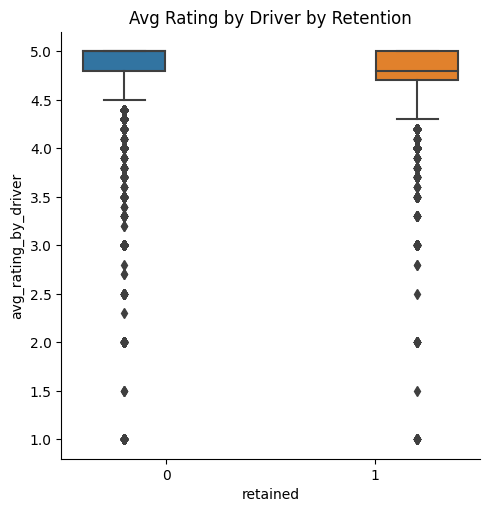

In [436]:
sns.catplot(x = 'retained', y = 'avg_rating_by_driver', data=riders, kind='box', hue='retained')
plt.title('Avg Rating by Driver by Retention')

Text(0.5, 1.0, 'Avg Rating by Driver by Retention')

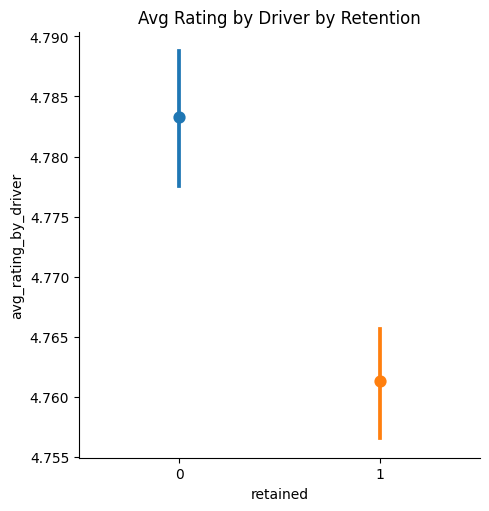

In [447]:
sns.catplot(x = 'retained', y = 'avg_rating_by_driver', data=riders, kind='point', hue='retained')
plt.title('Avg Rating by Driver by Retention')

Text(0.5, 1.0, 'Signup Date Days Since by Retention')

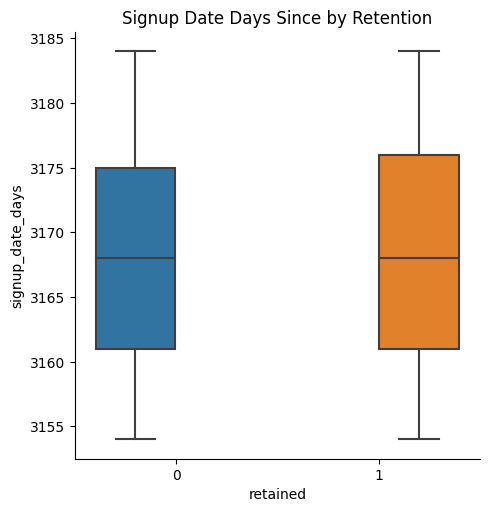

In [437]:
sns.catplot(x = 'retained', y = 'signup_date_days', data=riders, kind='box', hue='retained')
plt.title('Signup Date Days Since by Retention')

Text(0.5, 1.0, 'Signup Date Days Since by Retention')

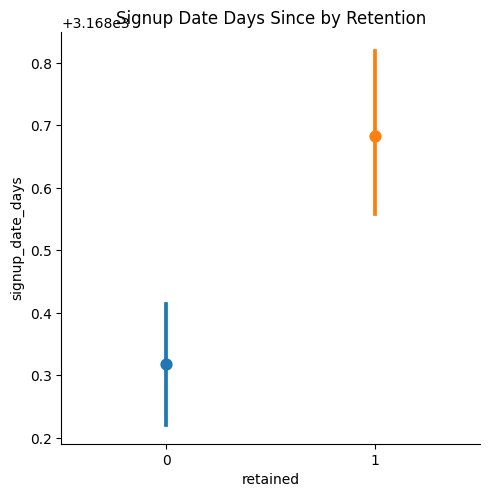

In [448]:
sns.catplot(x = 'retained', y = 'signup_date_days', data=riders, kind='point', hue='retained')
plt.title('Signup Date Days Since by Retention')

Text(0.5, 1.0, 'Last Trip Days Since by Retention')

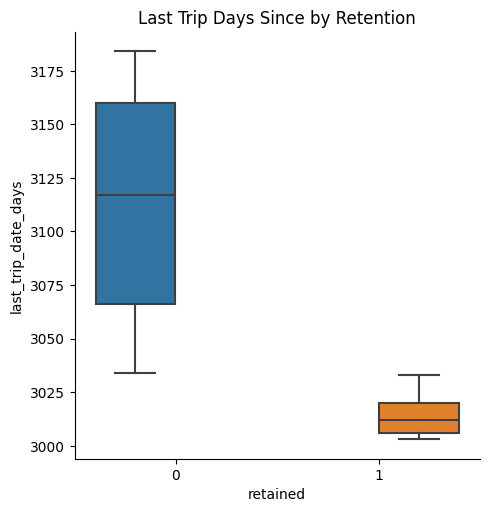

In [438]:
sns.catplot(x = 'retained', y = 'last_trip_date_days', data=riders, kind='box', hue='retained')
plt.title('Last Trip Days Since by Retention')

Text(0.5, 1.0, 'Last Trip Days Since by Retention')

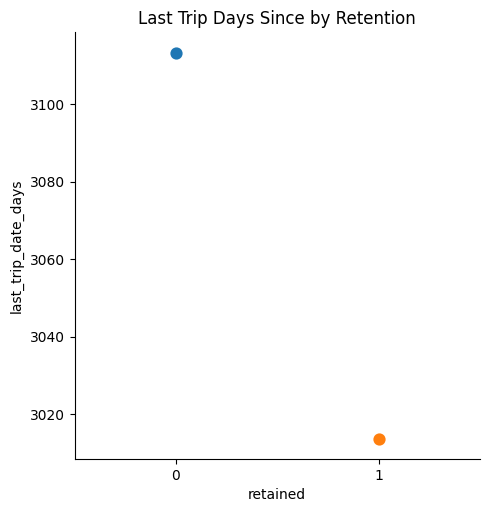

In [449]:
sns.catplot(x = 'retained', y = 'last_trip_date_days', data=riders, kind='point', hue='retained')
plt.title('Last Trip Days Since by Retention')

### Correlations

In [209]:
categorical_features= identify_nominal_columns(riders)


In [ ]:
associations(riders, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',  ax=None, figsize=None, annot=True, fmt='.2f', cmap=None, sv_color='silver',cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None, filename=None)

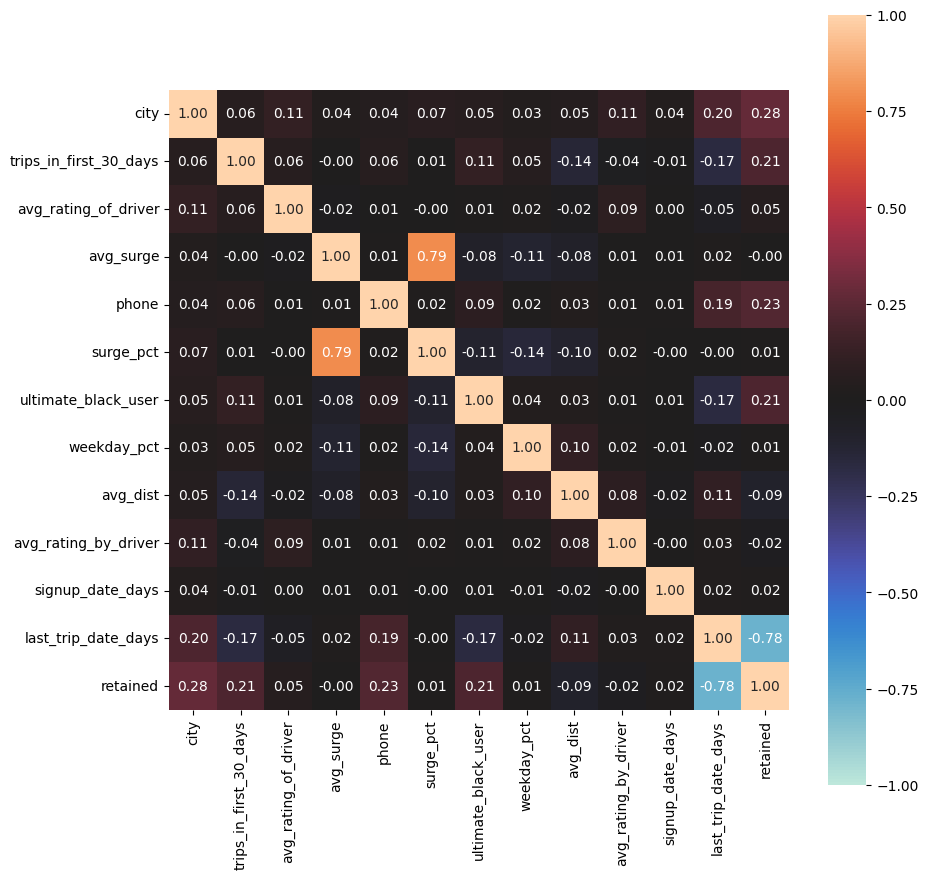

In [211]:
complete_correlation= associations(riders, filename= 'complete_correlation.png', figsize=(10,10))

Last trip date days is somewhat strongly correlated to the target and will need to be removed. surge_pct and average sureg are of course correlated. No other noticable correlations or issues with multicollinearity. 

### Pre-processing

Get dummy features with One Hot Encoding

In [213]:
riders = pd.get_dummies(riders, drop_first=True)
riders

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,signup_date_days,last_trip_date_days,retained,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,3159,3016,1,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,3155,3059,0,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,3178,3177,0,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,3174,3004,1,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,3157,3110,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.0,1.00,0.0,False,100.0,5.63,4.2,3159,3028,1,1,0,0,1
49996,1,4.0,1.00,0.0,False,0.0,0.00,4.0,3160,3159,0,0,0,0,1
49997,0,5.0,1.00,0.0,True,100.0,3.86,5.0,3153,3042,0,0,1,1,0
49998,2,3.0,1.00,0.0,False,100.0,4.58,3.5,3170,3169,0,0,0,0,1


In [214]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  bool   
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   signup_date_days        50000 non-null  int64  
 9   last_trip_date_days     50000 non-null  int64  
 10  retained                50000 non-null  int64  
 11  city_King's Landing     50000 non-null  uint8  
 12  city_Winterfell         50000 non-null  uint8  
 13  phone_Android           50000 non-null  uint8  
 14  phone_iPhone            50000 non-null

#### Split train and test sets

In [217]:
X = riders.drop(columns = ['retained', 'last_trip_date_days'])
y = riders['retained']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 11)


### Scale data sets by removing mean and scaling to unit variance.  

In [221]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Modeling Baseline

Simple Logistic Regression

In [253]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [254]:
y_pred = model.predict(X_train)

C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Training results

In [255]:

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24889
           1       0.38      1.00      0.55     15111

    accuracy                           0.38     40000
   macro avg       0.19      0.50      0.27     40000
weighted avg       0.14      0.38      0.21     40000



C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Testing results

In [256]:
y_pred = model.predict(X_test)

C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6307
           1       0.37      1.00      0.54      3693

    accuracy                           0.37     10000
   macro avg       0.18      0.50      0.27     10000
weighted avg       0.14      0.37      0.20     10000



C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### Model Experimentation

Search parameters inspired by Will Koehrsen in this [article](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [341]:
rf = RandomForestClassifier(random_state = 42)

# Create param grid.

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Create grid search object

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit on data

best = rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [342]:
best.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [343]:
best.best_score_

0.7833999547303817

In [344]:
y_pred = best.predict(X_train)

In [345]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     24889
           1       0.87      0.76      0.81     15111

    accuracy                           0.87     40000
   macro avg       0.87      0.85      0.85     40000
weighted avg       0.87      0.87      0.86     40000



In [346]:
y_pred = best.predict(X_test)

In [347]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6307
           1       0.73      0.65      0.69      3693

    accuracy                           0.78     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.78      0.78      0.78     10000



In [348]:
print(best)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)


### Random Forest Classifier

Bagging ensemble algorithm with best hyperparams

In [377]:
rf = RandomForestClassifier(n_estimators= 400,
 min_samples_split= 10,
 min_samples_leaf= 4,
 max_features= 'auto',
 max_depth= 70,
 bootstrap= True).fit(X_train, y_train)

C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [378]:
y_pred = best.predict(X_train)

In [379]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     24889
           1       0.87      0.76      0.81     15111

    accuracy                           0.87     40000
   macro avg       0.87      0.85      0.85     40000
weighted avg       0.87      0.87      0.86     40000



In [380]:
y_pred = best.predict(X_test)

In [381]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6307
           1       0.73      0.65      0.69      3693

    accuracy                           0.78     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.78      0.78      0.78     10000



C:\Users\Linds\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


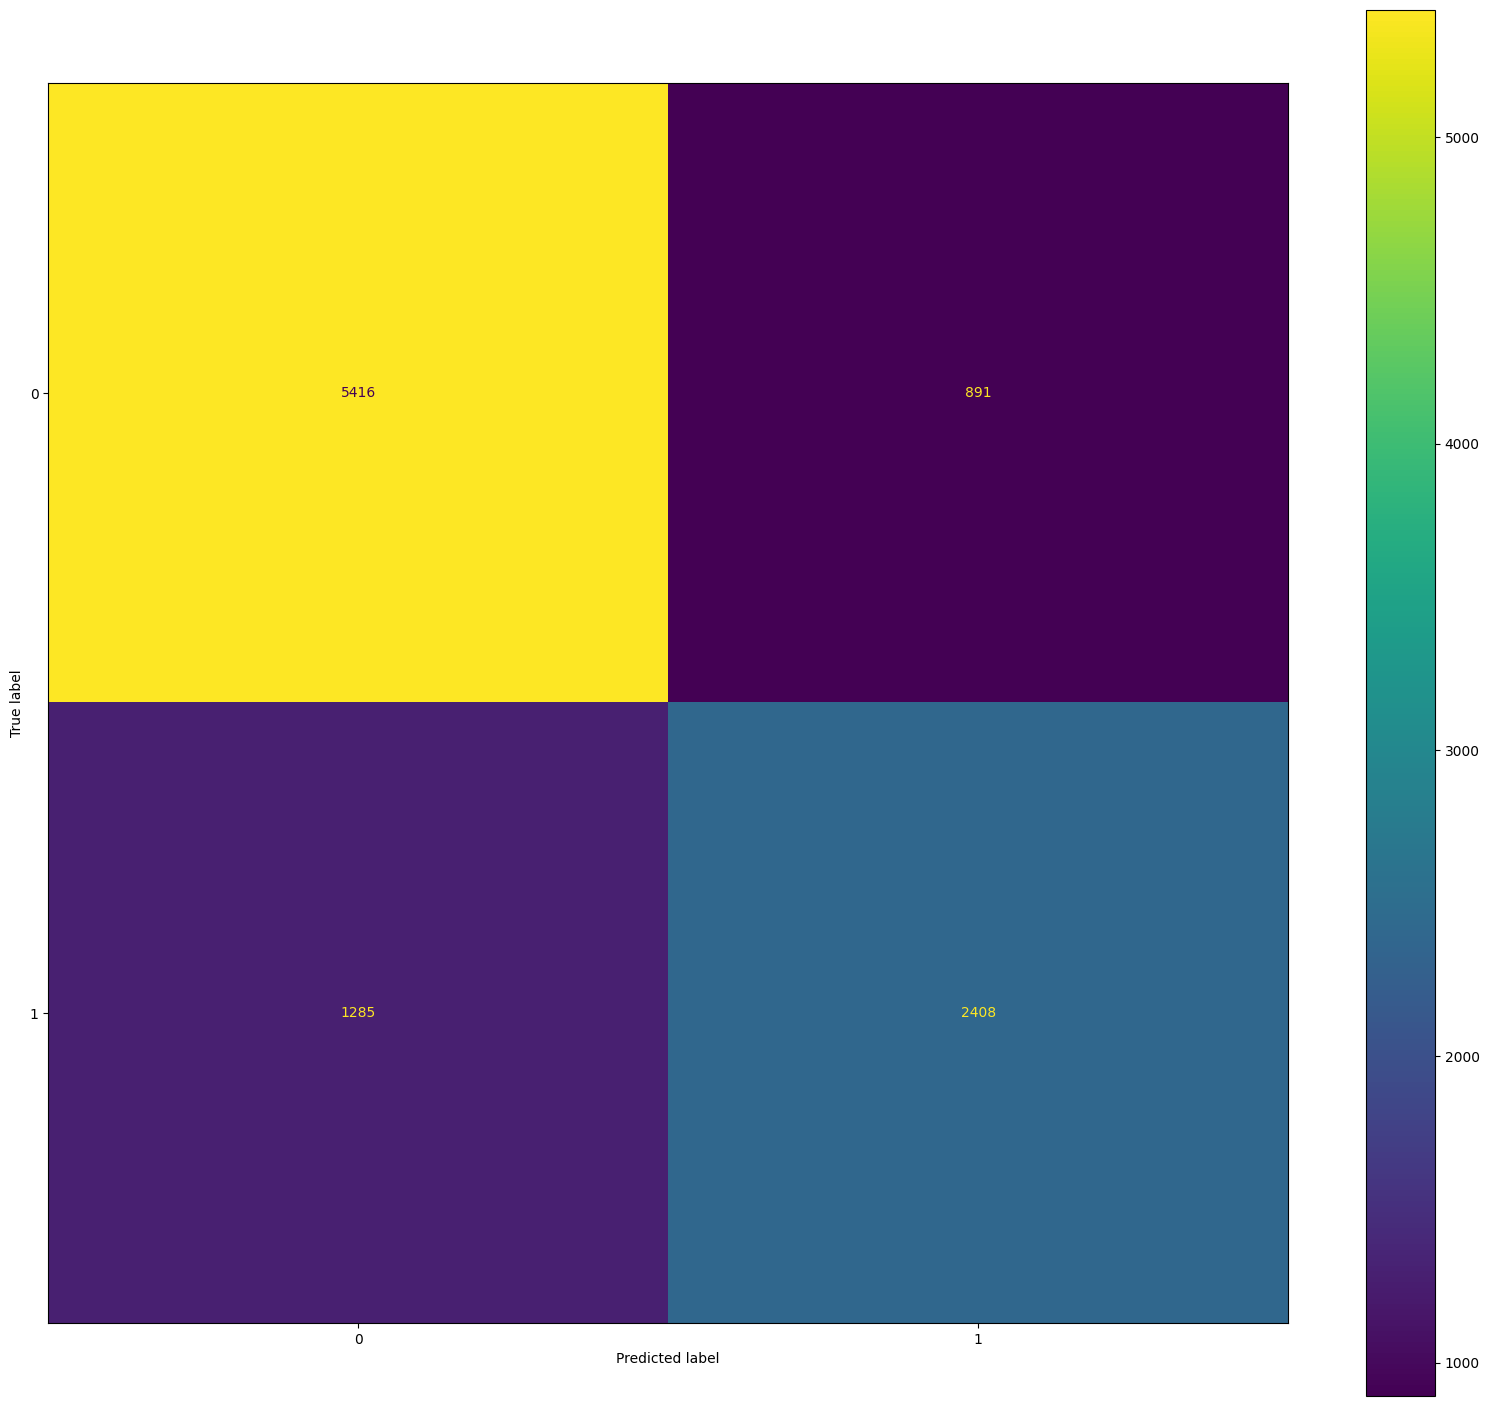

In [452]:
plot_confusion_matrix(best, X_test, y_test)  
plt.show()

False negatives are somewhat accouted for as we want to avoid labeling someone not retained when indeed they are. Can do better

### Feature Importance

In [387]:
importances = pd.DataFrame(data={
    'Attribute': X_test.columns,
    'Importance': rf.feature_importances_})

In [388]:
importances

,Attribute,Importance
0,trips_in_first_30_days,0.071031
1,avg_rating_of_driver,0.048744
2,avg_surge,0.078093
3,surge_pct,0.108492
4,ultimate_black_user,0.046215
5,weekday_pct,0.125772
6,avg_dist,0.113999
7,avg_rating_by_driver,0.145208
8,signup_date_days,0.079317
9,city_King's Landing,0.100277


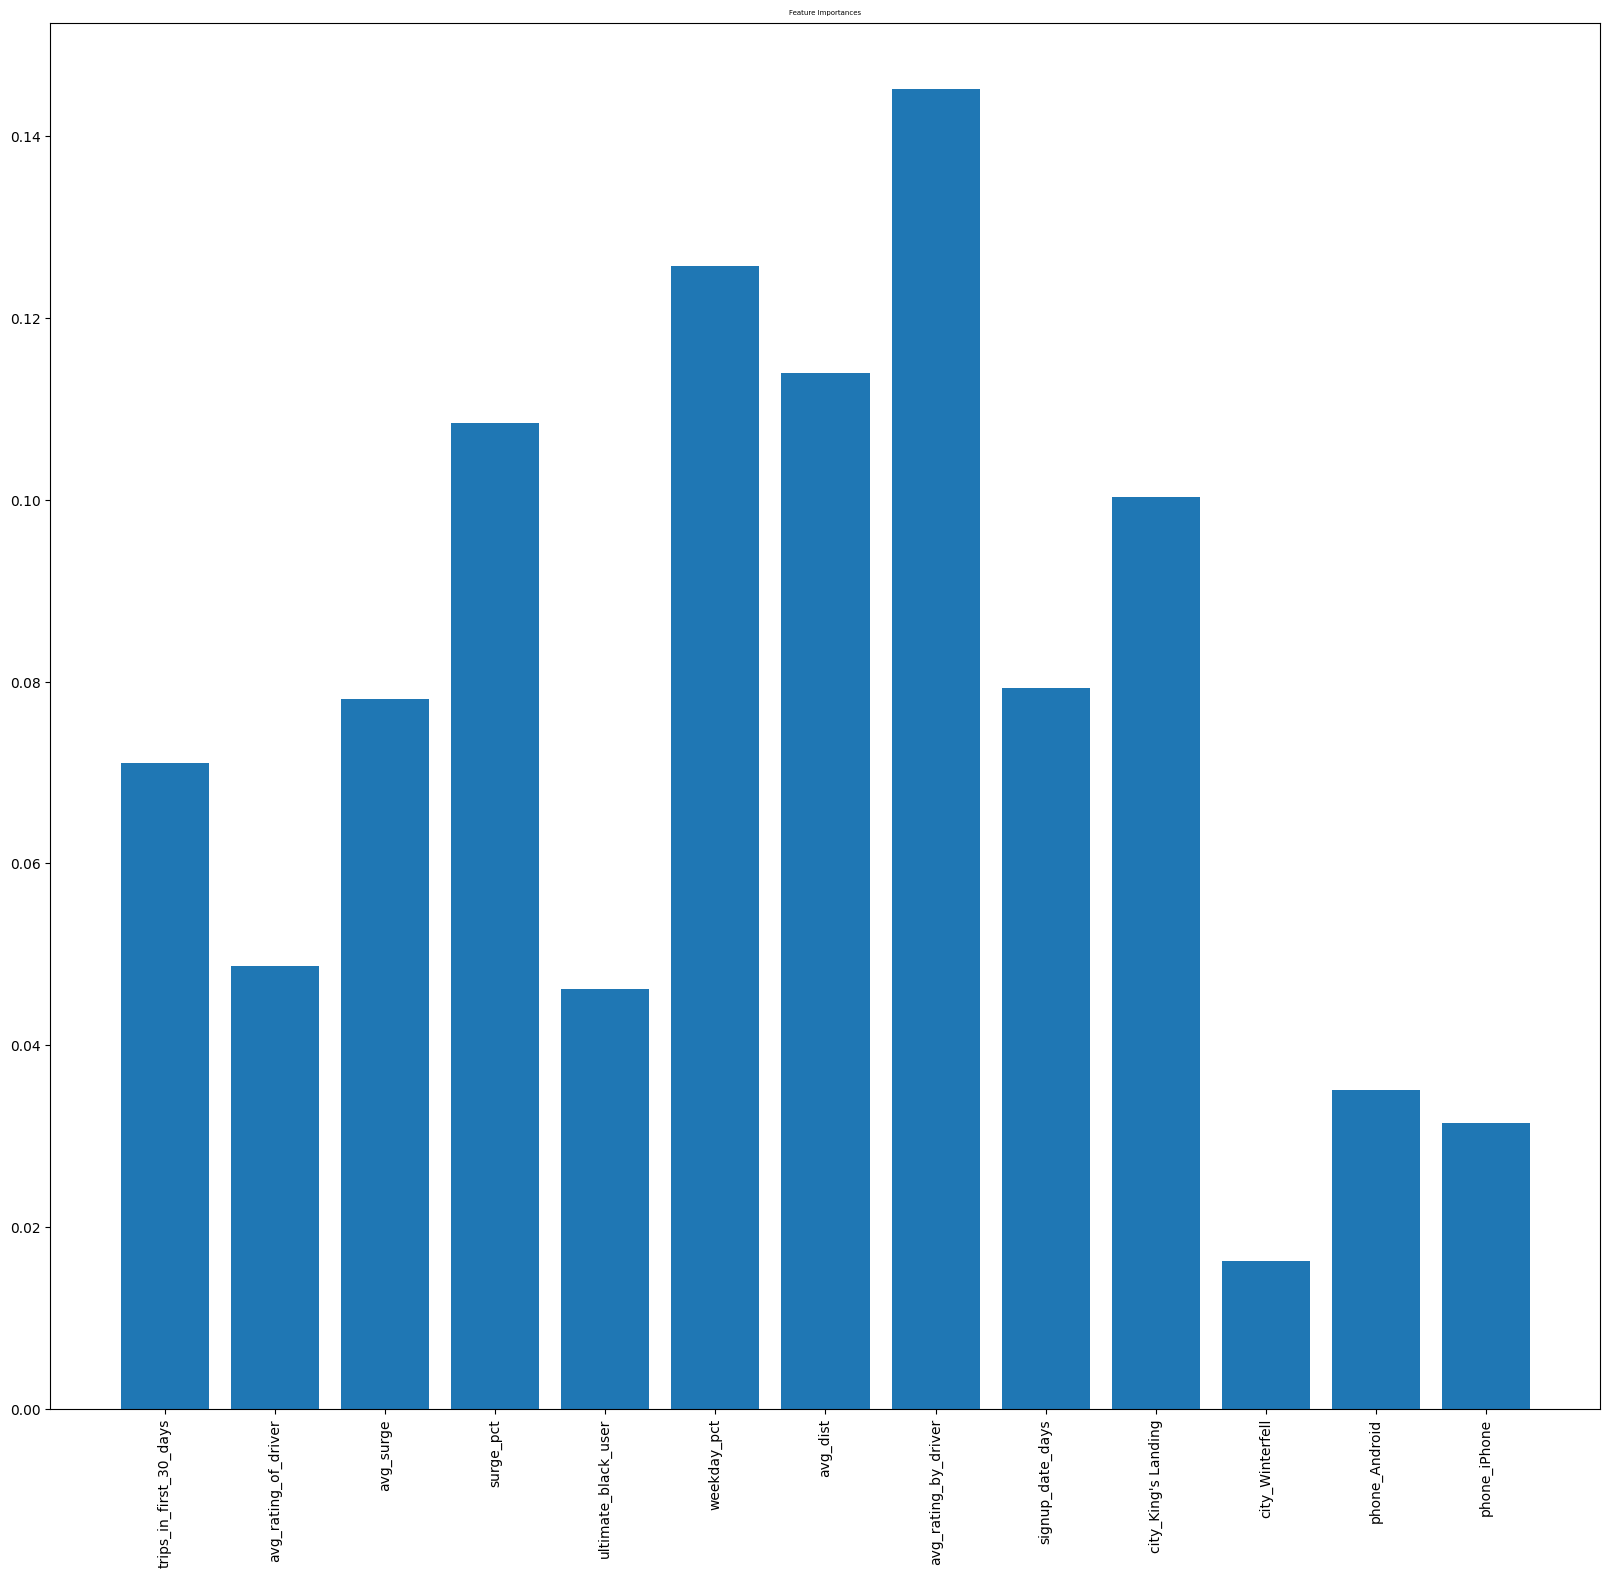

In [454]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature Importances', size=5)
plt.xticks(rotation='vertical')
plt.show()

1. What fraction of observed users were retained?

37.68% of users

2. Approach Summary - impute missing values, create target feature for binary classification, visualize relationships of features to target, transform datatypes and engineer features for modeling, baseline model with logistic regression and test model with Random Forest Classifier, evaluate model and review feature importance. 

3. Model Summary - Best performance of the Random Forest Classifer model was ran detailed RandomizedSerachCV for cross validation with Random Forest estimator for best parameters yielding best score. Best params included; 'n_estimators': 400,'min_samples_split': 10,'min_samples_leaf': 4,'max_features': 'auto','max_depth': 70,'bootstrap': True}. This scored a 69% on F1 (balance of percision and recall) and a 78% on accuracy. 

4. Concerns and alternatives - Recall or assurance against false negatives needs to be improved to make predictions more business risk averse by ignoring riders not labeled "retained" that should be. Given more time, I would run auto ML tools such as Pycaret to more quickly experiement with other models and hyperparameters. Then I would explore some ensemble methods to see if I can get a boost in scores to improve overall f1. I could also go back to paramete selection and implement BayesSearchCV instead to see how that impacts model performance. 

gb = GradientBoostingClassifier(n_estimators=50, max_features=2, learning_rate = 0.5,
                                random_state = 42, min_samples_split = 26, min_samples_leaf = 16, max_depth = 2).fit(X_train, y_train)

### Leveraging insights

1. Riders flagged for non-retention could  offer a use case for intervention and retention in marketing and operations campaigns. A tool for capturing more revenue. Existing customers are cheaper and easier to grow wallet share with than aquiring new cusotmers. 
2. Rider status can influence more targetted marketing. 
3. No strong feature influence on predictions to get very excited about.
4. Important to note that if the rider is taking early trips, within first 30 days of signing up. If they are taking roughly 3 trips in that period, it can somewhat correlate with a retention classification. This could be behavior that signals experiential offerings, promos and marketing to ensure they stay loyal.
4. The rider's rating by the driver is the first indicator of prediction of the features. Oddly enough, the slightly lower average rating indicates more likelieness to be retained. 
5. If the rider has a higher percentage of weekday trips, this is the second indicator of prediction. This observation paired with difference in avg distance between retained and non-retain (retained having lower average) might revel retained riders are more likely to be commuters?
6. If the rider signed up in the city of Kings Landing, that is the thrid indicator of prediction of interest. This would be a good target region to experiement with customer aquistion. 